I find this great notebook on the [github](https://github.com/AI4Finance-Foundation/FinRL-Tutorials/blob/master/1-Introduction/FinRL_PortfolioAllocation_NeurIPS_2020.ipynb). Thanks to all the contributors of FinRL!

There are more [materials](https://github.com/AI4Finance-Foundation/FinRL-Tutorials)

# Deep Reinforcement Learning for Stock Trading from Scratch: Portfolio Allocation

Tutorials to use OpenAI DRL to perform portfolio allocation in one Jupyter Notebook | Presented at NeurIPS 2020: Deep RL Workshop

* This blog is based on our paper: FinRL: A Deep Reinforcement Learning Library for Automated Stock Trading in Quantitative Finance, presented at NeurIPS 2020: Deep RL Workshop.
* Check out medium blog for detailed explanations: https://towardsdatascience.com/finrl-for-quantitative-finance-tutorial-for-portfolio-allocation-9b417660c7cd
* Please report any issues to our Github: https://github.com/AI4Finance-Foundation/FinRL/issues
* **Pytorch Version**



# Content

* [1. Problem Definition](#0)
* [2. Getting Started - Load Python packages](#1)
    * [2.1. Install Packages](#1.1)    
    * [2.2. Check Additional Packages](#1.2)
    * [2.3. Import Packages](#1.3)
    * [2.4. Create Folders](#1.4)
* [3. Download Data](#2)
* [4. Preprocess Data](#3)        
    * [4.1. Technical Indicators](#3.1)
    * [4.2. Perform Feature Engineering](#3.2)
* [5.Build Environment](#4)  
    * [5.1. Training & Trade Data Split](#4.1)
    * [5.2. User-defined Environment](#4.2)   
    * [5.3. Initialize Environment](#4.3)    
* [6.Implement DRL Algorithms](#5)  
* [7.Backtesting Performance](#6)  
    * [7.1. BackTestStats](#6.1)
    * [7.2. BackTestPlot](#6.2)   
    * [7.3. Baseline Stats](#6.3)   
    * [7.3. Compare to Stock Market Index](#6.4)             

<a id='0'></a>
# Part 1. Problem Definition

This problem is to design an automated trading solution for portfolio alloacation. We model the stock trading process as a Markov Decision Process (MDP). We then formulate our trading goal as a maximization problem.

The algorithm is trained using Deep Reinforcement Learning (DRL) algorithms and the components of the reinforcement learning environment are:


* Action: The action space describes the allowed actions that the agent interacts with the
environment. Normally, a ∈ A represents the weight of a stock in the porfolio: a ∈ (-1,1). Assume our stock pool includes N stocks, we can use a list [a<sub>1</sub>, a<sub>2</sub>, ... , a<sub>N</sub>] to determine the weight for each stock in the porfotlio, where a<sub>i</sub> ∈ (-1,1), a<sub>1</sub>+ a<sub>2</sub>+...+a<sub>N</sub>=1. For example, "The weight of AAPL in the portfolio is 10%." is [0.1 , ...].

* Reward function: r(s, a, s′) is the incentive mechanism for an agent to learn a better action. The change of the portfolio value when action a is taken at state s and arriving at new state s',  i.e., r(s, a, s′) = v′ − v, where v′ and v represent the portfolio
values at state s′ and s, respectively

* State: The state space describes the observations that the agent receives from the environment. Just as a human trader needs to analyze various information before executing a trade, so
our trading agent observes many different features to better learn in an interactive environment.

* Environment: Dow 30 consituents


The data of the single stock that we will be using for this case study is obtained from Yahoo Finance API. The data contains Open-High-Low-Close price and volume.


<a id='1'></a>
# Part 2. Getting Started- Load Python Packages

<a id='1.1'></a>
## 2.1. Install all the packages through FinRL library


In [5]:
# Restart runtime
# From the Runtime menu, select Restart runtime

# Uninstall current NumPy version
!pip uninstall -y numpy


# Upgrade or downgrade TensorBoard (if necessary)
!pip install --upgrade tensorboard

# Install necessary build tools and dependencies
!apt-get update
!apt-get install -y swig

!pip uninstall -y tensorboard numpy
!pip install numpy==1.22.4
!pip install tensorboard==2.8.0

# Install specific version of box2d-py
!pip install box2d-py==2.3.5

# Install other dependencies
!pip install gymnasium==0.29.1
!pip install stable-baselines3==2.4.0a1
!pip install ccxt==3.1.60
!pip install jqdatasdk==1.9.4
!pip install alpaca-trade-api==3.2.0
!pip install exchange-calendars==4.5.4
!pip install pyportfolioopt==1.5.5
!pip install ray[default,tune]==2.22.0
!pip install stockstats==0.5.4
!pip install wrds==3.2.0
!pip uninstall -y pandas

# Install pandas version 1.5.3
!pip install pandas==1.5.3

Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
  Using cached numpy-1.26.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.2 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pandas<2.2.2dev0,>=2.0, but you have pandas 2.2.2 which is incompatible.
pandas-gbq 0.19.2 requires google-auth-oauthlib>=0.7.0, but you have google-auth-oauthlib 0.4.6 which is incompatible.
tensorflow 2.15.0 requires tensorboard<2.16,>=2.15, but you have tensorboard 2.17.0 which is incompatible.
Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Get:3 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:5 https://deve

  Using cached tensorboard-2.8.0-py3-none-any.whl (5.8 MB)
  Using cached tensorboard_data_server-0.6.1-py3-none-manylinux2010_x86_64.whl (4.9 MB)
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.7.2
    Uninstalling tensorboard-data-server-0.7.2:
      Successfully uninstalled tensorboard-data-server-0.7.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires numpy<2.0.0,>=1.23.5, but you have numpy 1.22.4 which is incompatible.
tensorflow 2.15.0 requires tensorboard<2.16,>=2.15, but you have tensorboard 2.8.0 which is incompatible.


  Using cached numpy-1.26.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.2 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pandas<2.2.2dev0,>=2.0, but you have pandas 2.2.2 which is incompatible.
pandas-gbq 0.19.2 requires google-auth-oauthlib>=0.7.0, but you have google-auth-oauthlib 0.4.6 which is incompatible.
tensorflow 2.15.0 requires tensorboard<2.16,>=2.15, but you have tensorboard 2.8.0 which is incompatible.
Found existing installation: pandas 2.2.2
Uninstalling pandas-2.2.2:
  Successfully uninstalled pandas-2.2.2
  Using cached pandas-1.5.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.1 MB)
ERROR: pip's dependency resolver does not curre

In [172]:
## install finrl library
%pip install git+https://github.com/AI4Finance-LLC/FinRL-Library.git

  Cloning https://github.com/AI4Finance-LLC/FinRL-Library.git to /tmp/pip-req-build-43wh4pn5
  Running command git clone --filter=blob:none --quiet https://github.com/AI4Finance-LLC/FinRL-Library.git /tmp/pip-req-build-43wh4pn5
  Resolved https://github.com/AI4Finance-LLC/FinRL-Library.git to commit 625d5d24d517d711337c323ca751a5b241718bde
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Cloning https://github.com/AI4Finance-Foundation/ElegantRL.git to /tmp/pip-install-flk11coh/elegantrl_1e8b0d99971e4a6381c3c15235214374
  Running command git clone --filter=blob:none --quiet https://github.com/AI4Finance-Foundation/ElegantRL.git /tmp/pip-install-flk11coh/elegantrl_1e8b0d99971e4a6381c3c15235214374
  Resolved https://github.com/AI4Finance-Foundation/ElegantRL.git to commit 5ef11a573caeb79d1498119777dfd36bf155e14b
  Preparing metadata (setup.py) ... done



<a id='1.2'></a>
## 2.2. Check if the additional packages needed are present, if not install them.
* Yahoo Finance API
* pandas
* numpy
* matplotlib
* stockstats
* OpenAI gym
* stable-baselines
* tensorflow
* pyfolio

<a id='1.3'></a>
## 2.3. Import Packages

In [140]:
import warnings
warnings.filterwarnings("ignore")

In [141]:
pip install wrds

In [142]:
import pyfolio
from pyfolio import timeseries

In [143]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# matplotlib.use('Agg')
import datetime

%matplotlib inline
from finrl.config_tickers import DOW_30_TICKER
from finrl.meta.preprocessor.yahoodownloader import YahooDownloader
from finrl.meta.preprocessor.preprocessors import FeatureEngineer, data_split
from finrl.meta.env_stock_trading.env_stocktrading import StockTradingEnv
from finrl.agents.stablebaselines3.models import DRLAgent,DRLEnsembleAgent
from finrl.plot import backtest_stats, backtest_plot, get_daily_return, get_baseline

from pprint import pprint

import sys
sys.path.append("../FinRL-Library")

import itertools

In [144]:
import pandas as pd
import numpy as np
import matplotlib#
import matplotlib.pyplot as plt
matplotlib.use('Agg')
%matplotlib inline
import datetime

from finrl import config
from finrl import config_tickers
from finrl.meta.preprocessor.yahoodownloader import YahooDownloader
from finrl.meta.preprocessor.preprocessors import FeatureEngineer, data_split
from finrl.meta.env_portfolio_allocation.env_portfolio import StockPortfolioEnv
from finrl.agents.stablebaselines3.models import DRLAgent
from finrl.plot import backtest_stats, backtest_plot, get_daily_return, get_baseline,convert_daily_return_to_pyfolio_ts
from finrl.meta.data_processor import DataProcessor
from finrl.meta.data_processors.processor_yahoofinance import YahooFinanceProcessor
import sys
sys.path.append("../FinRL-Library")

<a id='1.4'></a>
## 2.4. Create Folders

In [145]:
import os
if not os.path.exists("./" + config.DATA_SAVE_DIR):
    os.makedirs("./" + config.DATA_SAVE_DIR)
if not os.path.exists("./" + config.TRAINED_MODEL_DIR):
    os.makedirs("./" + config.TRAINED_MODEL_DIR)
if not os.path.exists("./" + config.TENSORBOARD_LOG_DIR):
    os.makedirs("./" + config.TENSORBOARD_LOG_DIR)
if not os.path.exists("./" + config.RESULTS_DIR):
    os.makedirs("./" + config.RESULTS_DIR)

<a id='2'></a>
# Part 3. Download Data
Yahoo Finance is a website that provides stock data, financial news, financial reports, etc. All the data provided by Yahoo Finance is free.
* FinRL uses a class **YahooDownloader** to fetch data from Yahoo Finance API
* Call Limit: Using the Public API (without authentication), you are limited to 2,000 requests per hour per IP (or up to a total of 48,000 requests a day).


In [146]:
print(config_tickers.DOW_30_TICKER)

['AXP', 'AMGN', 'AAPL', 'BA', 'CAT', 'CSCO', 'CVX', 'GS', 'HD', 'HON', 'IBM', 'INTC', 'JNJ', 'KO', 'JPM', 'MCD', 'MMM', 'MRK', 'MSFT', 'NKE', 'PG', 'TRV', 'UNH', 'CRM', 'VZ', 'V', 'WBA', 'WMT', 'DIS', 'DOW']


In [147]:
dp = YahooFinanceProcessor()
df = YahooDownloader(start_date = '2008-01-01',end_date = '2021-10-31',ticker_list = DOW_30_TICKER).fetch_data()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

Shape of DataFrame:  (101615, 8)


In [148]:
df.head()

,date,open,high,low,close,volume,tic,day
0,2008-01-02,7.116786,7.152143,6.876786,5.883143,1079178800,AAPL,2
1,2008-01-02,46.599998,47.040001,46.259998,33.263287,7934400,AMGN,2
2,2008-01-02,52.090000,52.320000,50.790001,39.338634,8053700,AXP,2
3,2008-01-02,87.570000,87.839996,86.000000,63.481636,4303000,BA,2
4,2008-01-02,72.559998,72.669998,70.050003,45.230301,6337800,CAT,2


In [149]:
df.shape

(101615, 8)

# Part 4: Preprocess Data
Data preprocessing is a crucial step for training a high quality machine learning model. We need to check for missing data and do feature engineering in order to convert the data into a model-ready state.
* Add technical indicators. In practical trading, various information needs to be taken into account, for example the historical stock prices, current holding shares, technical indicators, etc. In this article, we demonstrate two trend-following technical indicators: MACD and RSI.
* Add turbulence index. Risk-aversion reflects whether an investor will choose to preserve the capital. It also influences one's trading strategy when facing different market volatility level. To control the risk in a worst-case scenario, such as financial crisis of 2007–2008, FinRL employs the financial turbulence index that measures extreme asset price fluctuation.

In [150]:
fe = FeatureEngineer(
                    use_technical_indicator=True,
                    use_turbulence=False,
                    user_defined_feature = False)

df = fe.preprocess_data(df)

Successfully added technical indicators


In [151]:
df.shape

(97524, 16)

In [152]:
df.head()

,date,open,high,low,close,volume,tic,day,macd,boll_ub,boll_lb,rsi_30,cci_30,dx_30,close_30_sma,close_60_sma
0,2008-01-02,7.116786,7.152143,6.876786,5.883143,1079178800,AAPL,2,0.0,5.888347,5.880658,100.0,-66.666667,100.0,5.883143,5.883143
3483,2008-01-02,46.599998,47.040001,46.259998,33.263287,7934400,AMGN,2,0.0,5.888347,5.880658,100.0,-66.666667,100.0,33.263287,33.263287
6966,2008-01-02,52.090000,52.320000,50.790001,39.338634,8053700,AXP,2,0.0,5.888347,5.880658,100.0,-66.666667,100.0,39.338634,39.338634
10449,2008-01-02,87.570000,87.839996,86.000000,63.481636,4303000,BA,2,0.0,5.888347,5.880658,100.0,-66.666667,100.0,63.481636,63.481636
13932,2008-01-02,72.559998,72.669998,70.050003,45.230301,6337800,CAT,2,0.0,5.888347,5.880658,100.0,-66.666667,100.0,45.230301,45.230301


## Add covariance matrix as states

In [153]:
# add covariance matrix as states
df=df.sort_values(['date','tic'],ignore_index=True)
df.index = df.date.factorize()[0]

cov_list = []
return_list = []

# look back is one year
lookback=252
for i in range(lookback,len(df.index.unique())):
  data_lookback = df.loc[i-lookback:i,:]
  price_lookback=data_lookback.pivot_table(index = 'date',columns = 'tic', values = 'close')
  return_lookback = price_lookback.pct_change().dropna()
  return_list.append(return_lookback)

  covs = return_lookback.cov().values
  cov_list.append(covs)


df_cov = pd.DataFrame({'date':df.date.unique()[lookback:],'cov_list':cov_list,'return_list':return_list})
df = df.merge(df_cov, on='date')
df = df.sort_values(['date','tic']).reset_index(drop=True)


In [154]:
df.shape

(90468, 18)

In [155]:
df.head()

,date,open,high,low,close,volume,tic,day,macd,boll_ub,boll_lb,rsi_30,cci_30,dx_30,close_30_sma,close_60_sma,cov_list,return_list
0,2008-12-31,3.070357,3.133571,3.047857,2.577121,607541200,AAPL,2,-0.082386,3.085524,2.447843,42.254777,-80.456522,16.129793,2.742337,2.854153,"[[0.001348969234055216, 0.0004284128642173072,...",tic AAPL AMGN AXP ...
1,2008-12-31,57.110001,58.220001,57.060001,41.222214,6287200,AMGN,2,0.154444,42.076916,40.250421,51.060633,51.504812,10.432018,40.452244,40.004690,"[[0.001348969234055216, 0.0004284128642173072,...",tic AAPL AMGN AXP ...
2,2008-12-31,17.969999,18.750000,17.910000,14.488906,9625600,AXP,2,-0.929689,18.529414,12.580728,42.554836,-75.453349,25.776759,15.644893,17.505409,"[[0.001348969234055216, 0.0004284128642173072,...",tic AAPL AMGN AXP ...
3,2008-12-31,41.590000,43.049999,41.500000,32.005882,5443100,BA,2,-0.279802,32.174384,28.867832,47.440226,156.994587,5.366299,30.327212,32.389916,"[[0.001348969234055216, 0.0004284128642173072,...",tic AAPL AMGN AXP ...
4,2008-12-31,43.700001,45.099998,43.700001,29.365068,6277400,CAT,2,0.650217,30.098418,25.246232,51.205306,98.364485,26.331746,26.469981,26.206210,"[[0.001348969234055216, 0.0004284128642173072,...",tic AAPL AMGN AXP ...


<a id='4'></a>
# Part 5. Design Environment
Considering the stochastic and interactive nature of the automated stock trading tasks, a financial task is modeled as a **Markov Decision Process (MDP)** problem. The training process involves observing stock price change, taking an action and reward's calculation to have the agent adjusting its strategy accordingly. By interacting with the environment, the trading agent will derive a trading strategy with the maximized rewards as time proceeds.

Our trading environments, based on OpenAI Gym framework, simulate live stock markets with real market data according to the principle of time-driven simulation.


## Training data split: 2009-01-01 to 2020-07-01

In [156]:
train = data_split(df, '2009-01-01','2020-07-01')
#trade = data_split(df, '2020-01-01', config.END_DATE)

In [157]:
train.head()

,date,open,high,low,close,volume,tic,day,macd,boll_ub,boll_lb,rsi_30,cci_30,dx_30,close_30_sma,close_60_sma,cov_list,return_list
0,2009-01-02,3.067143,3.251429,3.041429,2.740172,746015200,AAPL,4,-0.069968,3.072038,2.445779,45.440187,-32.239349,2.140064,2.743182,2.854953,"[[0.001366150782007844, 0.00043393836919722073...",tic AAPL AMGN AXP ...
0,2009-01-02,58.590000,59.080002,57.750000,42.107327,6547900,AMGN,4,0.228738,42.220363,40.215473,52.756858,92.754005,0.814217,40.515297,40.091536,"[[0.001366150782007844, 0.00043393836919722073...",tic AAPL AMGN AXP ...
0,2009-01-02,18.570000,19.520000,18.400000,15.098136,10955700,AXP,4,-0.826808,18.346955,12.564793,43.957529,-42.874060,16.335101,15.643592,17.389289,"[[0.001366150782007844, 0.00043393836919722073...",tic AAPL AMGN AXP ...
0,2009-01-02,42.799999,45.560001,42.779999,33.941093,7010200,BA,4,-0.002010,32.948626,28.452127,50.822032,272.812820,20.494464,30.469477,32.344131,"[[0.001366150782007844, 0.00043393836919722073...",tic AAPL AMGN AXP ...
0,2009-01-02,44.910000,46.980000,44.709999,30.837603,7117200,CAT,4,0.826329,30.596388,25.225519,53.661260,129.485569,34.637448,26.704884,26.206787,"[[0.001366150782007844, 0.00043393836919722073...",tic AAPL AMGN AXP ...


## Environment for Portfolio Allocation


In [158]:
import numpy as np
import pandas as pd
from gym.utils import seeding
import gym
from gym import spaces
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
from stable_baselines3.common.vec_env import DummyVecEnv


class StockPortfolioEnv(gym.Env):
    """A single stock trading environment for OpenAI gym

    Attributes
    ----------
        df: DataFrame
            input data
        stock_dim : int
            number of unique stocks
        hmax : int
            maximum number of shares to trade
        initial_amount : int
            start money
        transaction_cost_pct: float
            transaction cost percentage per trade
        reward_scaling: float
            scaling factor for reward, good for training
        state_space: int
            the dimension of input features
        action_space: int
            equals stock dimension
        tech_indicator_list: list
            a list of technical indicator names
        turbulence_threshold: int
            a threshold to control risk aversion
        day: int
            an increment number to control date

    Methods
    -------
    _sell_stock()
        perform sell action based on the sign of the action
    _buy_stock()
        perform buy action based on the sign of the action
    step()
        at each step the agent will return actions, then
        we will calculate the reward, and return the next observation.
    reset()
        reset the environment
    render()
        use render to return other functions
    save_asset_memory()
        return account value at each time step
    save_action_memory()
        return actions/positions at each time step


    """
    metadata = {'render.modes': ['human']}

    def __init__(self,
                df,
                stock_dim,
                hmax,
                initial_amount,
                transaction_cost_pct,
                reward_scaling,
                state_space,
                action_space,
                tech_indicator_list,
                turbulence_threshold=None,
                lookback=252,
                day = 0):
        #super(StockEnv, self).__init__()
        #money = 10 , scope = 1
        self.day = day
        self.lookback=lookback
        self.df = df
        self.stock_dim = stock_dim
        self.hmax = hmax
        self.initial_amount = initial_amount
        self.transaction_cost_pct =transaction_cost_pct
        self.reward_scaling = reward_scaling
        self.state_space = state_space
        self.action_space = action_space
        self.tech_indicator_list = tech_indicator_list

        # action_space normalization and shape is self.stock_dim
        self.action_space = spaces.Box(low = 0, high = 1,shape = (self.action_space,))
        # Shape = (34, 30)
        # covariance matrix + technical indicators
        self.observation_space = spaces.Box(low=-np.inf, high=np.inf, shape = (self.state_space+len(self.tech_indicator_list),self.state_space))

        # load data from a pandas dataframe
        self.data = self.df.loc[self.day,:]
        self.covs = self.data['cov_list'].values[0]
        self.state =  np.append(np.array(self.covs), [self.data[tech].values.tolist() for tech in self.tech_indicator_list ], axis=0)
        self.terminal = False
        self.turbulence_threshold = turbulence_threshold
        # initalize state: inital portfolio return + individual stock return + individual weights
        self.portfolio_value = self.initial_amount

        # memorize portfolio value each step
        self.asset_memory = [self.initial_amount]
        # memorize portfolio return each step
        self.portfolio_return_memory = [0]
        self.actions_memory=[[1/self.stock_dim]*self.stock_dim]
        self.date_memory=[self.data.date.unique()[0]]


    def step(self, actions):
        # print(self.day)
        self.terminal = self.day >= len(self.df.index.unique())-1
        # print(actions)

        if self.terminal:
            df = pd.DataFrame(self.portfolio_return_memory)
            df.columns = ['daily_return']
            plt.plot(df.daily_return.cumsum(),'r')
            plt.savefig('results/cumulative_reward.png')
            plt.close()

            plt.plot(self.portfolio_return_memory,'r')
            plt.savefig('results/rewards.png')
            plt.close()

            print("=================================")
            print("begin_total_asset:{}".format(self.asset_memory[0]))
            print("end_total_asset:{}".format(self.portfolio_value))

            df_daily_return = pd.DataFrame(self.portfolio_return_memory)
            df_daily_return.columns = ['daily_return']
            if df_daily_return['daily_return'].std() !=0:
              sharpe = (252**0.5)*df_daily_return['daily_return'].mean()/ \
                       df_daily_return['daily_return'].std()
              print("Sharpe: ",sharpe)
            print("=================================")

            return self.state, self.reward, self.terminal,{}

        else:
            #print("Model actions: ",actions)
            # actions are the portfolio weight
            # normalize to sum of 1
            #if (np.array(actions) - np.array(actions).min()).sum() != 0:
            #  norm_actions = (np.array(actions) - np.array(actions).min()) / (np.array(actions) - np.array(actions).min()).sum()
            #else:
            #  norm_actions = actions
            weights = self.softmax_normalization(actions)
            #print("Normalized actions: ", weights)
            self.actions_memory.append(weights)
            last_day_memory = self.data

            #load next state
            self.day += 1
            self.data = self.df.loc[self.day,:]
            self.covs = self.data['cov_list'].values[0]
            self.state =  np.append(np.array(self.covs), [self.data[tech].values.tolist() for tech in self.tech_indicator_list ], axis=0)
            #print(self.state)
            # calcualte portfolio return
            # individual stocks' return * weight
            portfolio_return = sum(((self.data.close.values / last_day_memory.close.values)-1)*weights)
            # update portfolio value
            new_portfolio_value = self.portfolio_value*(1+portfolio_return)
            self.portfolio_value = new_portfolio_value

            # save into memory
            self.portfolio_return_memory.append(portfolio_return)
            self.date_memory.append(self.data.date.unique()[0])
            self.asset_memory.append(new_portfolio_value)

            # the reward is the new portfolio value or end portfolo value
            self.reward = new_portfolio_value
            #print("Step reward: ", self.reward)
            #self.reward = self.reward*self.reward_scaling

        return self.state, self.reward, self.terminal, {}

    def reset(self):
        self.asset_memory = [self.initial_amount]
        self.day = 0
        self.data = self.df.loc[self.day,:]
        # load states
        self.covs = self.data['cov_list'].values[0]
        self.state =  np.append(np.array(self.covs), [self.data[tech].values.tolist() for tech in self.tech_indicator_list ], axis=0)
        self.portfolio_value = self.initial_amount
        #self.cost = 0
        #self.trades = 0
        self.terminal = False
        self.portfolio_return_memory = [0]
        self.actions_memory=[[1/self.stock_dim]*self.stock_dim]
        self.date_memory=[self.data.date.unique()[0]]
        return self.state

    def render(self, mode='human'):
        return self.state

    def softmax_normalization(self, actions):
        numerator = np.exp(actions)
        denominator = np.sum(np.exp(actions))
        softmax_output = numerator/denominator
        return softmax_output


    def save_asset_memory(self):
        date_list = self.date_memory
        portfolio_return = self.portfolio_return_memory
        #print(len(date_list))
        #print(len(asset_list))
        df_account_value = pd.DataFrame({'date':date_list,'daily_return':portfolio_return})
        return df_account_value

    def save_action_memory(self):
        # date and close price length must match actions length
        date_list = self.date_memory
        df_date = pd.DataFrame(date_list)
        df_date.columns = ['date']

        action_list = self.actions_memory
        df_actions = pd.DataFrame(action_list)
        df_actions.columns = self.data.tic.values
        df_actions.index = df_date.date
        #df_actions = pd.DataFrame({'date':date_list,'actions':action_list})
        return df_actions

    def _seed(self, seed=None):
        self.np_random, seed = seeding.np_random(seed)
        return [seed]

    def get_sb_env(self):
        e = DummyVecEnv([lambda: self])
        obs = e.reset()
        return e, obs

In [159]:
stock_dimension = len(train.tic.unique())
state_space = stock_dimension
print(f"Stock Dimension: {stock_dimension}, State Space: {state_space}")


Stock Dimension: 28, State Space: 28


In [160]:
env_kwargs = {
    "hmax": 100,
    "initial_amount": 1000000,
    "transaction_cost_pct": 0.001,
    "state_space": state_space,
    "stock_dim": stock_dimension,
    "tech_indicator_list": config.INDICATORS,
    "action_space": stock_dimension,
    "reward_scaling": 1e-4

}

e_train_gym = StockPortfolioEnv(df = train, **env_kwargs)

In [161]:
env_train, _ = e_train_gym.get_sb_env()
print(type(env_train))

<class 'stable_baselines3.common.vec_env.dummy_vec_env.DummyVecEnv'>


<a id='5'></a>
# Part 6: Implement DRL Algorithms
* The implementation of the DRL algorithms are based on **OpenAI Baselines** and **Stable Baselines**. Stable Baselines is a fork of OpenAI Baselines, with a major structural refactoring, and code cleanups.
* FinRL library includes fine-tuned standard DRL algorithms, such as DQN, DDPG,
Multi-Agent DDPG, PPO, SAC, A2C and TD3. We also allow users to
design their own DRL algorithms by adapting these DRL algorithms.

In [162]:
# initialize
agent = DRLAgent(env = env_train)

### Model 1: **A2C**


In [163]:
agent = DRLAgent(env = env_train)

A2C_PARAMS = {"n_steps": 5, "ent_coef": 0.005, "learning_rate": 0.0002}
model_a2c = agent.get_model(model_name="a2c",model_kwargs = A2C_PARAMS)

{'n_steps': 5, 'ent_coef': 0.005, 'learning_rate': 0.0002}
Using cpu device


In [164]:
trained_a2c = agent.train_model(model=model_a2c,
                                tb_log_name='a2c',
                                total_timesteps=50000)

-------------------------------------
| time/                 |           |
|    fps                | 217       |
|    iterations         | 100       |
|    time_elapsed       | 2         |
|    total_timesteps    | 500       |
| train/                |           |
|    entropy_loss       | -39.6     |
|    explained_variance | -2.38e-07 |
|    learning_rate      | 0.0002    |
|    n_updates          | 99        |
|    policy_loss        | 2.12e+08  |
|    reward             | 1684753.5 |
|    std                | 0.997     |
|    value_loss         | 2.99e+13  |
-------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 214       |
|    iterations         | 200       |
|    time_elapsed       | 4         |
|    total_timesteps    | 1000      |
| train/                |           |
|    entropy_loss       | -39.6     |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0002    |
|    n_updat

In [165]:
trained_a2c.save('/content/trained_models/trained_a2c.zip')

### Model 2: **PPO**


In [166]:
agent = DRLAgent(env = env_train)
PPO_PARAMS = {
    "n_steps": 2048,
    "ent_coef": 0.005,
    "learning_rate": 0.0001,
    "batch_size": 128,
}
model_ppo = agent.get_model("ppo",model_kwargs = PPO_PARAMS)

{'n_steps': 2048, 'ent_coef': 0.005, 'learning_rate': 0.0001, 'batch_size': 128}
Using cpu device


In [167]:
trained_ppo = agent.train_model(model=model_ppo,
                             tb_log_name='ppo',
                             total_timesteps=80000)

----------------------------------
| time/              |           |
|    fps             | 339       |
|    iterations      | 1         |
|    time_elapsed    | 6         |
|    total_timesteps | 2048      |
| train/             |           |
|    reward          | 3849194.5 |
----------------------------------
begin_total_asset:1000000
end_total_asset:5497080.140970891
Sharpe:  0.9042392144143085
---------------------------------------
| time/                   |           |
|    fps                  | 273       |
|    iterations           | 2         |
|    time_elapsed         | 14        |
|    total_timesteps      | 4096      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -39.7     |
|    explained_variance   | 0         |
|    learning_rate        | 0.0001    |
|    loss                 | 7.63e+14  |
|    n_updates            | 10       

In [168]:
trained_ppo.save('/content/trained_models/trained_ppo.zip')

### Model 3: **DDPG**


# New section

In [169]:
agent = DRLAgent(env = env_train)
DDPG_PARAMS = {"batch_size": 128, "buffer_size": 50000, "learning_rate": 0.001}


model_ddpg = agent.get_model("ddpg",model_kwargs = DDPG_PARAMS)

{'batch_size': 128, 'buffer_size': 50000, 'learning_rate': 0.001}
Using cpu device


In [177]:
trained_ddpg = agent.train_model(model=model_ddpg,
                             tb_log_name='ddpg',
                             total_timesteps=50000)

begin_total_asset:1000000
end_total_asset:6307193.713290294
Sharpe:  0.9711939779701609
begin_total_asset:1000000
end_total_asset:6207058.465583633
Sharpe:  0.9612203987128717
begin_total_asset:1000000
end_total_asset:6207058.465583633
Sharpe:  0.9612203987128717
begin_total_asset:1000000
end_total_asset:6207058.465583633
Sharpe:  0.9612203987128717
----------------------------------
| time/              |           |
|    episodes        | 4         |
|    fps             | 14        |
|    time_elapsed    | 801       |
|    total_timesteps | 11572     |
| train/             |           |
|    actor_loss      | -1.35e+08 |
|    critic_loss     | 1.78e+12  |
|    learning_rate   | 0.001     |
|    n_updates       | 11685     |
|    reward          | 6207058.5 |
----------------------------------
begin_total_asset:1000000
end_total_asset:6207058.465583633
Sharpe:  0.9612203987128717
begin_total_asset:1000000
end_total_asset:6207058.465583633
Sharpe:  0.9612203987128717
begin_total_asset

In [178]:
trained_ddpg.save('/content/trained_models/trained_ddpg.zip')

### Model 4: **SAC**


In [180]:
agent = DRLAgent(env = env_train)
SAC_PARAMS = {
    "batch_size": 128,
    "buffer_size": 100000,
    "learning_rate": 0.0003,
    "learning_starts": 100,
    "ent_coef": "auto_0.1",
}

model_sac = agent.get_model("sac",model_kwargs = SAC_PARAMS)

{'batch_size': 128, 'buffer_size': 100000, 'learning_rate': 0.0003, 'learning_starts': 100, 'ent_coef': 'auto_0.1'}
Using cpu device


In [181]:
trained_sac = agent.train_model(model=model_sac,
                             tb_log_name='sac',
                             total_timesteps=50000)

begin_total_asset:1000000
end_total_asset:5667522.834825949
Sharpe:  0.925065188558154
begin_total_asset:1000000
end_total_asset:5748613.046300342
Sharpe:  0.9311125729429509
begin_total_asset:1000000
end_total_asset:5748720.5331599405
Sharpe:  0.931121067016621
begin_total_asset:1000000
end_total_asset:5748789.951269185
Sharpe:  0.9311283352825169
----------------------------------
| time/              |           |
|    episodes        | 4         |
|    fps             | 14        |
|    time_elapsed    | 823       |
|    total_timesteps | 11572     |
| train/             |           |
|    actor_loss      | -1.32e+08 |
|    critic_loss     | 1.64e+12  |
|    ent_coef        | 3.26      |
|    ent_coef_loss   | -197      |
|    learning_rate   | 0.0003    |
|    n_updates       | 11471     |
|    reward          | 5748790.0 |
----------------------------------
begin_total_asset:1000000
end_total_asset:5748599.614548507
Sharpe:  0.9311126082050563
begin_total_asset:1000000
end_total_

In [182]:
trained_sac.save('/content/trained_models/trained_sac.zip')

### Model 5: **TD3**


In [183]:
agent = DRLAgent(env = env_train)
TD3_PARAMS = {"batch_size": 100,
              "buffer_size": 1000000,
              "learning_rate": 0.001}

model_td3 = agent.get_model("td3",model_kwargs = TD3_PARAMS)

{'batch_size': 100, 'buffer_size': 1000000, 'learning_rate': 0.001}
Using cpu device


In [186]:
trained_td3 = agent.train_model(model=model_td3,
                             tb_log_name='td3',
                             total_timesteps=30000)

begin_total_asset:1000000
end_total_asset:5814131.407351838
Sharpe:  0.9354894120968303
begin_total_asset:1000000
end_total_asset:5840244.038451212
Sharpe:  0.9397622936934618
begin_total_asset:1000000
end_total_asset:5840244.038451212
Sharpe:  0.9397622936934618
begin_total_asset:1000000
end_total_asset:5840244.038451212
Sharpe:  0.9397622936934618
----------------------------------
| time/              |           |
|    episodes        | 4         |
|    fps             | 16        |
|    time_elapsed    | 721       |
|    total_timesteps | 11572     |
| train/             |           |
|    actor_loss      | -1.07e+08 |
|    critic_loss     | 2.59e+12  |
|    learning_rate   | 0.001     |
|    n_updates       | 16740     |
|    reward          | 5840244.0 |
----------------------------------
begin_total_asset:1000000
end_total_asset:5840244.038451212
Sharpe:  0.9397622936934618
begin_total_asset:1000000
end_total_asset:5840244.038451212
Sharpe:  0.9397622936934618
begin_total_asset

In [187]:
trained_td3.save('/content/trained_models/trained_td3.zip')

## Trading
Assume that we have $1,000,000 initial capital at 2019-01-01. We use the A2C model to trade Dow jones 30 stocks.

In [ ]:
trade = data_split(df,'2020-07-01', '2021-10-31')
e_trade_gym = StockPortfolioEnv(df = trade, **env_kwargs)


In [ ]:
trade.shape

In [ ]:
df_daily_return, df_actions = DRLAgent.DRL_prediction(model=trained_a2c,
                        environment = e_trade_gym)

In [ ]:
df_daily_return.head()

In [ ]:
df_daily_return.to_csv('df_daily_return.csv')

In [ ]:
df_actions.head()

In [ ]:
df_actions.to_csv('df_actions.csv')

<a id='6'></a>
# Part 7: Backtest Our Strategy
Backtesting plays a key role in evaluating the performance of a trading strategy. Automated backtesting tool is preferred because it reduces the human error. We usually use the Quantopian pyfolio package to backtest our trading strategies. It is easy to use and consists of various individual plots that provide a comprehensive image of the performance of a trading strategy.

<a id='6.1'></a>
## 7.1 BackTestStats
pass in df_account_value, this information is stored in env class


In [ ]:
from pyfolio import timeseries
DRL_strat = convert_daily_return_to_pyfolio_ts(df_daily_return)
perf_func = timeseries.perf_stats
perf_stats_all = perf_func( returns=DRL_strat,
                              factor_returns=DRL_strat,
                                positions=None, transactions=None, turnover_denom="AGB")

In [ ]:
print("==============DRL Strategy Stats===========")
perf_stats_all

In [ ]:
#baseline stats
print("==============Get Baseline Stats===========")
baseline_df = get_baseline(
        ticker="^DJI",
        start = df_daily_return.loc[0,'date'],
        end = df_daily_return.loc[len(df_daily_return)-1,'date'])

stats = backtest_stats(baseline_df, value_col_name = 'close')

<a id='6.2'></a>
## 7.2 BackTestPlot

In [ ]:
import pyfolio

In [ ]:
import pyfolio as pf
import pandas as pd
import numpy as np
import empyrical
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure your data is in the correct format
# Assuming DRL_strat and baseline_returns are your return series

# Convert index to datetime if it's not already
DRL_strat.index = pd.to_datetime(DRL_strat.index)
baseline_returns.index = pd.to_datetime(baseline_returns.index)

# Verify and convert if necessary
if not isinstance(DRL_strat.index, pd.DatetimeIndex):
    DRL_strat.index = pd.to_datetime(DRL_strat.index)

if not isinstance(baseline_returns.index, pd.DatetimeIndex):
    baseline_returns.index = pd.to_datetime(baseline_returns.index)

# Align both series to ensure they have the same dates
DRL_strat = DRL_strat.reindex(baseline_returns.index, method='ffill')
baseline_returns = baseline_returns.reindex(DRL_strat.index, method='ffill')

# Function to calculate drawdowns
def calculate_drawdowns(returns):
    cumulative_returns = empyrical.cum_returns(returns, starting_value=1.0)
    high_water_marks = cumulative_returns.cummax()
    drawdowns = cumulative_returns / high_water_marks - 1
    return drawdowns

# Function to create a drawdown table
def create_drawdown_table(returns, top=10):
    drawdowns = calculate_drawdowns(returns)
    drawdown_periods = []

    peak = 0
    valley = 0
    recovery = np.nan

    for t in range(1, len(drawdowns)):
        if drawdowns.iloc[t] < drawdowns.iloc[valley]:
            valley = t
        if drawdowns.iloc[t] > drawdowns.iloc[peak]:
            peak = t
            valley = t
        if np.isnan(recovery) and drawdowns.iloc[t] == 0:
            recovery = t
        if not np.isnan(recovery):
            drawdown_periods.append((peak, valley, recovery))
            recovery = np.nan  # Reset recovery to find the next one

    drawdown_df = pd.DataFrame(drawdown_periods, columns=['Peak', 'Valley', 'Recovery'])
    drawdown_df['Peak date'] = returns.index[drawdown_df['Peak']]
    drawdown_df['Valley date'] = returns.index[drawdown_df['Valley']]
    drawdown_df['Recovery date'] = returns.index[drawdown_df['Recovery']]
    drawdown_df['Net drawdown in %'] = [drawdowns.iloc[v] * -100 for v in drawdown_df['Valley']]
    drawdown_df = drawdown_df[['Peak date', 'Valley date', 'Recovery date', 'Net drawdown in %']]
    return drawdown_df.sort_values(by='Net drawdown in %', ascending=False).head(top)

# Function to print summary statistics
def print_summary_stats(returns, benchmark_rets):
    perf_stats = pf.timeseries.perf_stats(returns)
    benchmark_perf_stats = pf.timeseries.perf_stats(benchmark_rets)

    print("Start date:", returns.index[0])
    print("End date:", returns.index[-1])
    print("Total months:", len(returns) // 21)  # Approximation
    print("\nBacktest Performance")
    print(perf_stats)
    print("\nBenchmark Performance")
    print(benchmark_perf_stats)

    drawdown_table = create_drawdown_table(returns)
    print("\nWorst drawdown periods")
    print(drawdown_table)

# Define the plots to be generated
def plot_returns(returns, benchmark_rets):
    fig, ax = plt.subplots(figsize=(10, 6))
    pf.plotting.plot_rolling_returns(returns, factor_returns=benchmark_rets, ax=ax)
    plt.show()

def plot_rolling_volatility(returns, benchmark_rets):
    fig, ax = plt.subplots(figsize=(10, 6))
    pf.plotting.plot_rolling_volatility(returns, factor_returns=benchmark_rets, ax=ax)
    plt.show()

def plot_rolling_sharpe(returns):
    fig, ax = plt.subplots(figsize=(10, 6))
    pf.plotting.plot_rolling_sharpe(returns, ax=ax)
    plt.show()

def plot_drawdown_underwater(returns):
    fig, ax = plt.subplots(figsize=(10, 6))
    pf.plotting.plot_drawdown_underwater(returns, ax=ax)
    plt.show()

def plot_monthly_returns_heatmap(returns):
    fig, ax = plt.subplots(figsize=(10, 6))
    pf.plotting.plot_monthly_returns_heatmap(returns, ax=ax)
    plt.show()

def plot_annual_returns(returns):
    fig, ax = plt.subplots(figsize=(10, 6))
    pf.plotting.plot_annual_returns(returns, ax=ax)
    plt.show()

# Print summary statistics
print_summary_stats(DRL_strat, baseline_returns)

# Manually create the full tear sheet except the problematic plots
with pf.plotting.plotting_context(font_scale=1.1):
    plot_returns(DRL_strat, baseline_returns)
    plot_rolling_volatility(DRL_strat, baseline_returns)
    plot_rolling_sharpe(DRL_strat)
    plot_drawdown_underwater(DRL_strat)
    plot_monthly_returns_heatmap(DRL_strat)
    plot_annual_returns(DRL_strat)

# Manually create the drawdown plot
drawdown_table = create_drawdown_table(DRL_strat)

plt.figure(figsize=(10, 6))
sns.barplot(x='Net drawdown in %', y='Peak date', data=drawdown_table)
plt.title('Worst Drawdown Periods')
plt.xlabel('Net drawdown in %')
plt.ylabel('Peak date')
plt.show()

## Min-Variance Portfolio Allocation

In [ ]:
%pip install PyPortfolioOpt

In [ ]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models

In [ ]:
unique_tic = trade.tic.unique()
unique_trade_date = trade.date.unique()

In [ ]:
df.head()

In [ ]:
#calculate_portfolio_minimum_variance
portfolio = pd.DataFrame(index = range(1), columns = unique_trade_date)
initial_capital = 1000000
portfolio.loc[0,unique_trade_date[0]] = initial_capital

for i in range(len( unique_trade_date)-1):
    df_temp = df[df.date==unique_trade_date[i]].reset_index(drop=True)
    df_temp_next = df[df.date==unique_trade_date[i+1]].reset_index(drop=True)
    #Sigma = risk_models.sample_cov(df_temp.return_list[0])
    #calculate covariance matrix
    Sigma = df_temp.return_list[0].cov()
    #portfolio allocation
    ef_min_var = EfficientFrontier(None, Sigma,weight_bounds=(0, 0.1))
    #minimum variance
    raw_weights_min_var = ef_min_var.min_volatility()
    #get weights
    cleaned_weights_min_var = ef_min_var.clean_weights()

    #current capital
    cap = portfolio.iloc[0, i]
    #current cash invested for each stock
    current_cash = [element * cap for element in list(cleaned_weights_min_var.values())]
    # current held shares
    current_shares = list(np.array(current_cash)
                                      / np.array(df_temp.close))
    # next time period price
    next_price = np.array(df_temp_next.close)
    ##next_price * current share to calculate next total account value
    portfolio.iloc[0, i+1] = np.dot(current_shares, next_price)

portfolio=portfolio.T
portfolio.columns = ['account_value']

In [ ]:
portfolio.head()

In [ ]:
a2c_cumpod =(df_daily_return.daily_return+1).cumprod()-1

In [ ]:
min_var_cumpod =(portfolio.account_value.pct_change()+1).cumprod()-1

In [ ]:
dji_cumpod =(baseline_returns+1).cumprod()-1

## Plotly: DRL, Min-Variance, DJIA

In [ ]:
%pip install plotly

In [ ]:
from datetime import datetime as dt

import matplotlib.pyplot as plt
import plotly
import plotly.graph_objs as go

In [ ]:
time_ind = pd.Series(df_daily_return.date)

In [ ]:
trace0_portfolio = go.Scatter(x = time_ind, y = a2c_cumpod, mode = 'lines', name = 'A2C (Portfolio Allocation)')

trace1_portfolio = go.Scatter(x = time_ind, y = dji_cumpod, mode = 'lines', name = 'DJIA')
trace2_portfolio = go.Scatter(x = time_ind, y = min_var_cumpod, mode = 'lines', name = 'Min-Variance')
#trace3_portfolio = go.Scatter(x = time_ind, y = ddpg_cumpod, mode = 'lines', name = 'DDPG')
#trace4_portfolio = go.Scatter(x = time_ind, y = addpg_cumpod, mode = 'lines', name = 'Adaptive-DDPG')
#trace5_portfolio = go.Scatter(x = time_ind, y = min_cumpod, mode = 'lines', name = 'Min-Variance')

#trace4 = go.Scatter(x = time_ind, y = addpg_cumpod, mode = 'lines', name = 'Adaptive-DDPG')

#trace2 = go.Scatter(x = time_ind, y = portfolio_cost_minv, mode = 'lines', name = 'Min-Variance')
#trace3 = go.Scatter(x = time_ind, y = spx_value, mode = 'lines', name = 'SPX')

In [ ]:
fig = go.Figure()
fig.add_trace(trace0_portfolio)

fig.add_trace(trace1_portfolio)

fig.add_trace(trace2_portfolio)



fig.update_layout(
    legend=dict(
        x=0,
        y=1,
        traceorder="normal",
        font=dict(
            family="sans-serif",
            size=15,
            color="black"
        ),
        bgcolor="White",
        bordercolor="white",
        borderwidth=2

    ),
)
#fig.update_layout(legend_orientation="h")
fig.update_layout(title={
        #'text': "Cumulative Return using FinRL",
        'y':0.85,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
#with Transaction cost
#fig.update_layout(title =  'Quarterly Trade Date')
fig.update_layout(
#    margin=dict(l=20, r=20, t=20, b=20),

    paper_bgcolor='rgba(1,1,0,0)',
    plot_bgcolor='rgba(1, 1, 0, 0)',
    #xaxis_title="Date",
    yaxis_title="Cumulative Return",
xaxis={'type': 'date',
       'tick0': time_ind[0],
        'tickmode': 'linear',
       'dtick': 86400000.0 *80}

)
fig.update_xaxes(showline=True,linecolor='black',showgrid=True, gridwidth=1, gridcolor='LightSteelBlue',mirror=True)
fig.update_yaxes(showline=True,linecolor='black',showgrid=True, gridwidth=1, gridcolor='LightSteelBlue',mirror=True)
fig.update_yaxes(zeroline=True, zerolinewidth=1, zerolinecolor='LightSteelBlue')

fig.show()

# PPO

[*********************100%%**********************]  1 of 1 completed

begin_total_asset:1000000
end_total_asset:1423864.905299731
Sharpe:  2.0054828422144455
hit end!
==============DRL Strategy Stats===========
==============Get Baseline Stats===========
Shape of DataFrame:  (336, 8)
Annual return          0.279047
Cumulative returns     0.388402
Annual volatility      0.139129
Sharpe ratio           1.844560
Calmar ratio           3.124551
Stability              0.918675
Max drawdown          -0.089308
Omega ratio            1.358960
Sortino ratio          2.734872
Skew                        NaN
Kurtosis                    NaN
Tail ratio             1.052781
Daily value at risk   -0.016510
dtype: float64


Start date: 2020-07-01 00:00:00+00:00
End date: 2021-10-29 00:00:00+00:00
Total months: 16

Backtest Performance
Annual return          0.302447
Cumulative returns     0.423865
Annual volatility      0.136458
Sharpe ratio           2.005483
Calmar ratio           3.616480
Stability              0.919413
Max drawdown          -0.083630
Omega ratio            1.397056
Sortino ratio          3.059983
Skew                  -0.143018
Kurtosis               1.366253
Tail ratio             1.111503
Daily value at risk   -0.016106
dtype: float64

Benchmark Performance
Annual return          0.280495
Cumulative returns     0.391863
Annual volatility      0.138927
Sharpe ratio           1.855203
Calmar ratio           3.140767
Stability              0.918753
Max drawdown          -0.089308
Omega ratio            1.361583
Sortino ratio          2.750755
Skew                        NaN
Kurtosis                    NaN
Tail ratio             1.053708
Daily value at risk   -0.016480
dtype: float64

W

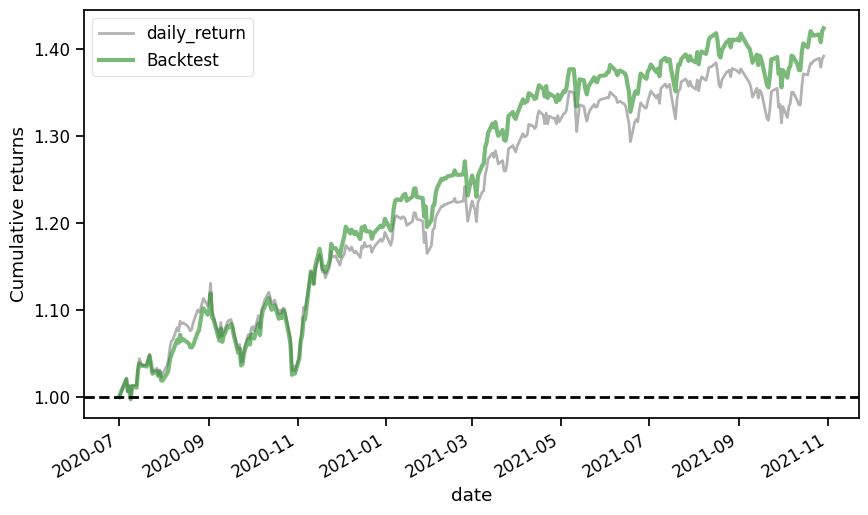

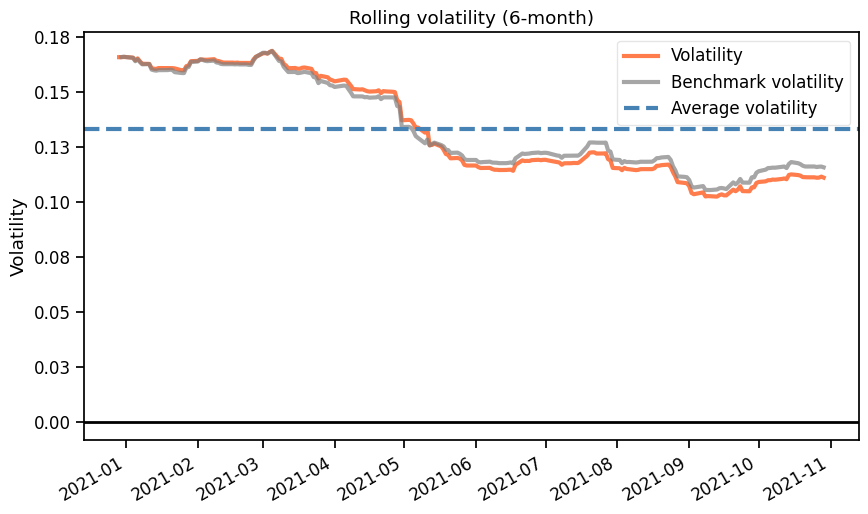

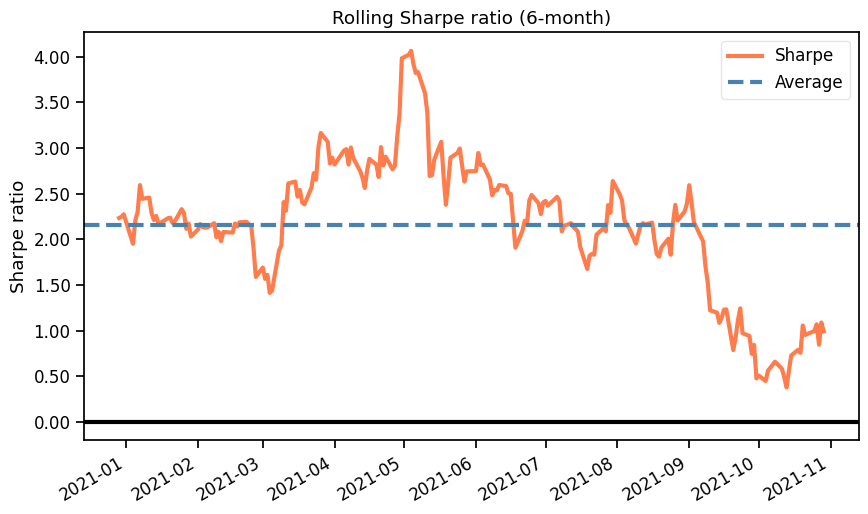

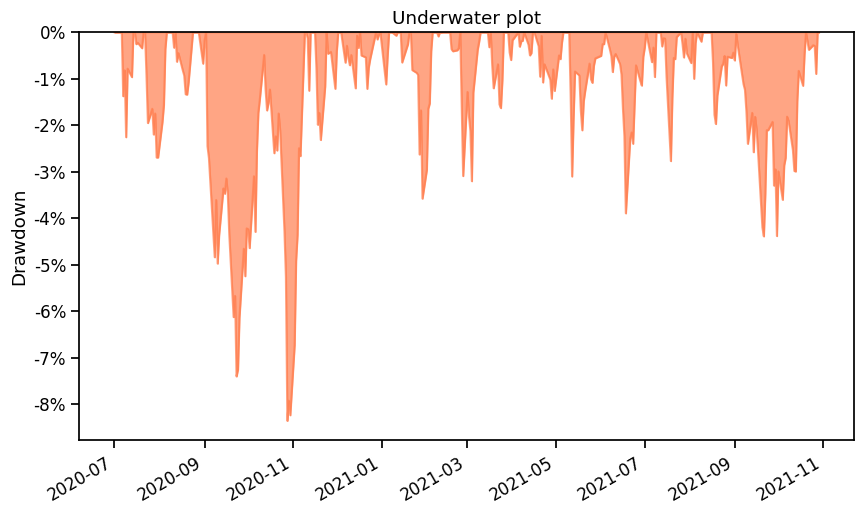

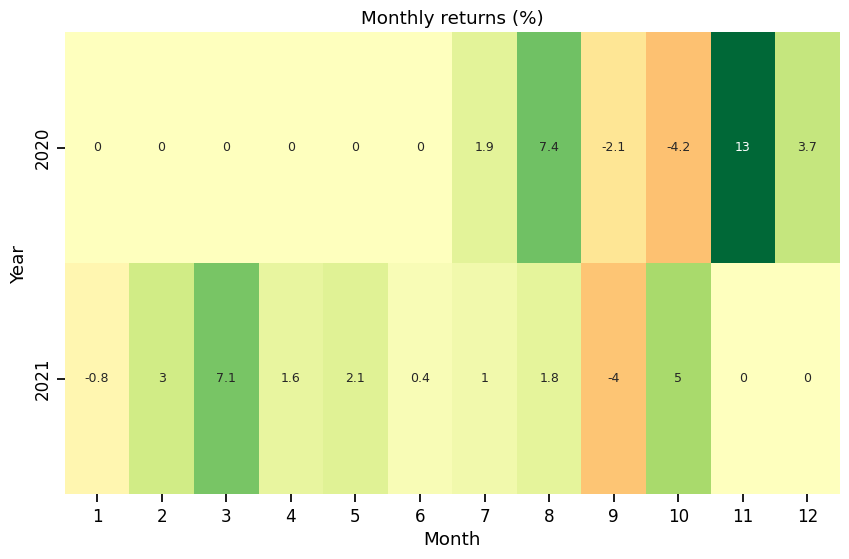

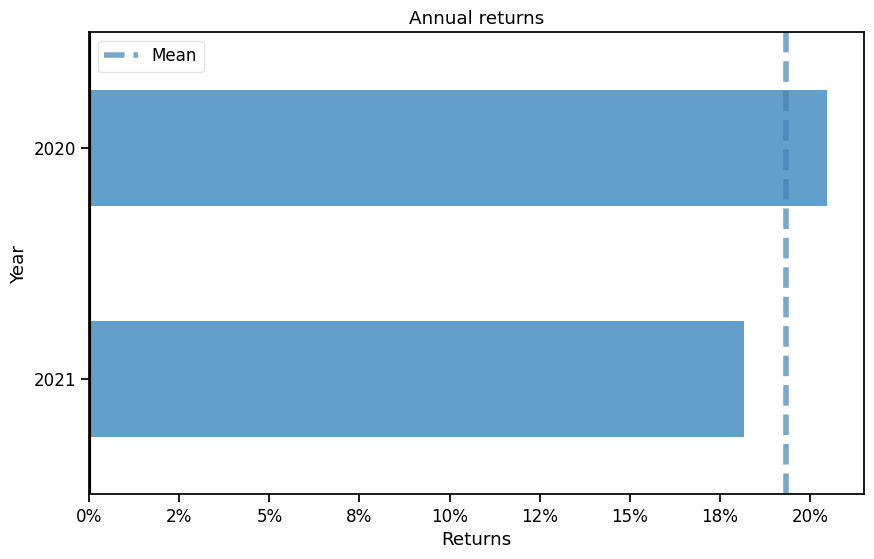

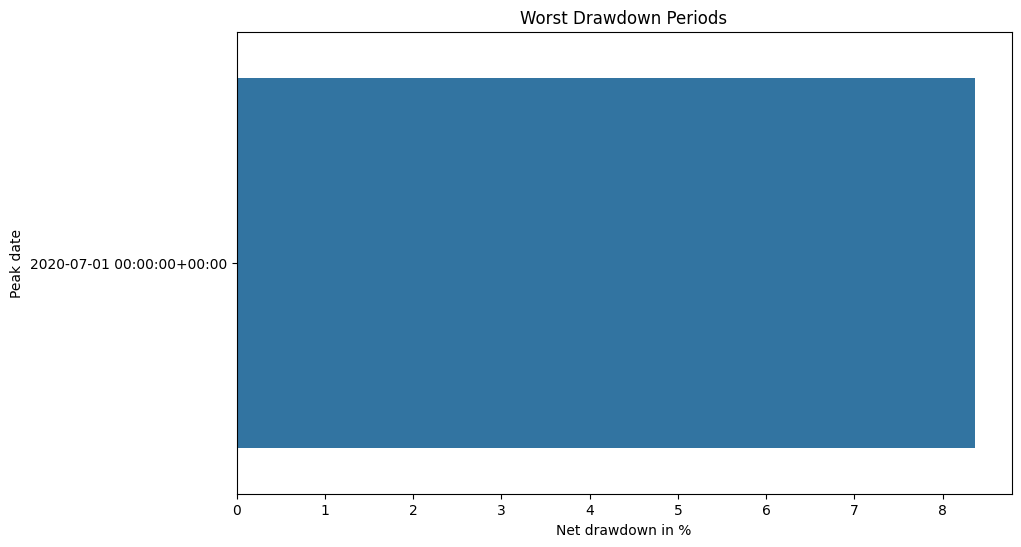

In [176]:
%matplotlib inline

trade = data_split(df,'2020-07-01', '2021-10-31')
e_trade_gym = StockPortfolioEnv(df = trade, **env_kwargs)

trade.shape

df_daily_return, df_actions = DRLAgent.DRL_prediction(model=trained_ppo,
                        environment = e_trade_gym)

df_daily_return.head()

df_daily_return.to_csv('df_daily_return.csv')

df_actions.head()

df_actions.to_csv('df_actions.csv')

"""<a id='6'></a>
# Part 7: Backtest Our Strategy
Backtesting plays a key role in evaluating the performance of a trading strategy. Automated backtesting tool is preferred because it reduces the human error. We usually use the Quantopian pyfolio package to backtest our trading strategies. It is easy to use and consists of various individual plots that provide a comprehensive image of the performance of a trading strategy.

<a id='6.1'></a>
## 7.1 BackTestStats
pass in df_account_value, this information is stored in env class
"""

from pyfolio import timeseries
DRL_strat = convert_daily_return_to_pyfolio_ts(df_daily_return)
perf_func = timeseries.perf_stats
perf_stats_all = perf_func( returns=DRL_strat,
                              factor_returns=DRL_strat,
                                positions=None, transactions=None, turnover_denom="AGB")

print("==============DRL Strategy Stats===========")
perf_stats_all

#baseline stats
print("==============Get Baseline Stats===========")
baseline_df = get_baseline(
        ticker="^DJI",
        start = df_daily_return.loc[0,'date'],
        end = df_daily_return.loc[len(df_daily_return)-1,'date'])

stats = backtest_stats(baseline_df, value_col_name = 'close')

"""<a id='6.2'></a>
## 7.2 BackTestPlot
"""

import pyfolio

import pyfolio as pf
import pandas as pd
import numpy as np
import empyrical
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure your data is in the correct format
# Assuming DRL_strat and baseline_returns are your return series

# Convert index to datetime if it's not already
DRL_strat.index = pd.to_datetime(DRL_strat.index)
baseline_returns.index = pd.to_datetime(baseline_returns.index)

# Verify and convert if necessary
if not isinstance(DRL_strat.index, pd.DatetimeIndex):
    DRL_strat.index = pd.to_datetime(DRL_strat.index)

if not isinstance(baseline_returns.index, pd.DatetimeIndex):
    baseline_returns.index = pd.to_datetime(baseline_returns.index)

# Align both series to ensure they have the same dates
DRL_strat = DRL_strat.reindex(baseline_returns.index, method='ffill')
baseline_returns = baseline_returns.reindex(DRL_strat.index, method='ffill')

# Function to calculate drawdowns
def calculate_drawdowns(returns):
    cumulative_returns = empyrical.cum_returns(returns, starting_value=1.0)
    high_water_marks = cumulative_returns.cummax()
    drawdowns = cumulative_returns / high_water_marks - 1
    return drawdowns

# Function to create a drawdown table
def create_drawdown_table(returns, top=10):
    drawdowns = calculate_drawdowns(returns)
    drawdown_periods = []

    peak = 0
    valley = 0
    recovery = np.nan

    for t in range(1, len(drawdowns)):
        if drawdowns.iloc[t] < drawdowns.iloc[valley]:
            valley = t
        if drawdowns.iloc[t] > drawdowns.iloc[peak]:
            peak = t
            valley = t
        if np.isnan(recovery) and drawdowns.iloc[t] == 0:
            recovery = t
        if not np.isnan(recovery):
            drawdown_periods.append((peak, valley, recovery))
            recovery = np.nan  # Reset recovery to find the next one

    drawdown_df = pd.DataFrame(drawdown_periods, columns=['Peak', 'Valley', 'Recovery'])
    drawdown_df['Peak date'] = returns.index[drawdown_df['Peak']]
    drawdown_df['Valley date'] = returns.index[drawdown_df['Valley']]
    drawdown_df['Recovery date'] = returns.index[drawdown_df['Recovery']]
    drawdown_df['Net drawdown in %'] = [drawdowns.iloc[v] * -100 for v in drawdown_df['Valley']]
    drawdown_df = drawdown_df[['Peak date', 'Valley date', 'Recovery date', 'Net drawdown in %']]
    return drawdown_df.sort_values(by='Net drawdown in %', ascending=False).head(top)

# Function to print summary statistics
def print_summary_stats(returns, benchmark_rets):
    perf_stats = pf.timeseries.perf_stats(returns)
    benchmark_perf_stats = pf.timeseries.perf_stats(benchmark_rets)

    print("Start date:", returns.index[0])
    print("End date:", returns.index[-1])
    print("Total months:", len(returns) // 21)  # Approximation
    print("\nBacktest Performance")
    print(perf_stats)
    print("\nBenchmark Performance")
    print(benchmark_perf_stats)

    drawdown_table = create_drawdown_table(returns)
    print("\nWorst drawdown periods")
    print(drawdown_table)

# Define the plots to be generated
def plot_returns(returns, benchmark_rets):
    fig, ax = plt.subplots(figsize=(10, 6))
    pf.plotting.plot_rolling_returns(returns, factor_returns=benchmark_rets, ax=ax)
    plt.show()

def plot_rolling_volatility(returns, benchmark_rets):
    fig, ax = plt.subplots(figsize=(10, 6))
    pf.plotting.plot_rolling_volatility(returns, factor_returns=benchmark_rets, ax=ax)
    plt.show()

def plot_rolling_sharpe(returns):
    fig, ax = plt.subplots(figsize=(10, 6))
    pf.plotting.plot_rolling_sharpe(returns, ax=ax)
    plt.show()

def plot_drawdown_underwater(returns):
    fig, ax = plt.subplots(figsize=(10, 6))
    pf.plotting.plot_drawdown_underwater(returns, ax=ax)
    plt.show()

def plot_monthly_returns_heatmap(returns):
    fig, ax = plt.subplots(figsize=(10, 6))
    pf.plotting.plot_monthly_returns_heatmap(returns, ax=ax)
    plt.show()

def plot_annual_returns(returns):
    fig, ax = plt.subplots(figsize=(10, 6))
    pf.plotting.plot_annual_returns(returns, ax=ax)
    plt.show()

# Print summary statistics
print_summary_stats(DRL_strat, baseline_returns)

# Manually create the full tear sheet except the problematic plots
with pf.plotting.plotting_context(font_scale=1.1):
    plot_returns(DRL_strat, baseline_returns)
    plot_rolling_volatility(DRL_strat, baseline_returns)
    plot_rolling_sharpe(DRL_strat)
    plot_drawdown_underwater(DRL_strat)
    plot_monthly_returns_heatmap(DRL_strat)
    plot_annual_returns(DRL_strat)

# Manually create the drawdown plot
drawdown_table = create_drawdown_table(DRL_strat)

plt.figure(figsize=(10, 6))
sns.barplot(x='Net drawdown in %', y='Peak date', data=drawdown_table)
plt.title('Worst Drawdown Periods')
plt.xlabel('Net drawdown in %')
plt.ylabel('Peak date')
plt.show()

"""## Min-Variance Portfolio Allocation"""

# Commented out IPython magic to ensure Python compatibility.
# %pip install PyPortfolioOpt

from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models

unique_tic = trade.tic.unique()
unique_trade_date = trade.date.unique()

df.head()

#calculate_portfolio_minimum_variance
portfolio = pd.DataFrame(index = range(1), columns = unique_trade_date)
initial_capital = 1000000
portfolio.loc[0,unique_trade_date[0]] = initial_capital

for i in range(len( unique_trade_date)-1):
    df_temp = df[df.date==unique_trade_date[i]].reset_index(drop=True)
    df_temp_next = df[df.date==unique_trade_date[i+1]].reset_index(drop=True)
    #Sigma = risk_models.sample_cov(df_temp.return_list[0])
    #calculate covariance matrix
    Sigma = df_temp.return_list[0].cov()
    #portfolio allocation
    ef_min_var = EfficientFrontier(None, Sigma,weight_bounds=(0, 0.1))
    #minimum variance
    raw_weights_min_var = ef_min_var.min_volatility()
    #get weights
    cleaned_weights_min_var = ef_min_var.clean_weights()

    #current capital
    cap = portfolio.iloc[0, i]
    #current cash invested for each stock
    current_cash = [element * cap for element in list(cleaned_weights_min_var.values())]
    # current held shares
    current_shares = list(np.array(current_cash)
                                      / np.array(df_temp.close))
    # next time period price
    next_price = np.array(df_temp_next.close)
    ##next_price * current share to calculate next total account value
    portfolio.iloc[0, i+1] = np.dot(current_shares, next_price)

portfolio=portfolio.T
portfolio.columns = ['account_value']

portfolio.head()

a2c_cumpod =(df_daily_return.daily_return+1).cumprod()-1

min_var_cumpod =(portfolio.account_value.pct_change()+1).cumprod()-1

dji_cumpod =(baseline_returns+1).cumprod()-1

"""## Plotly: DRL, Min-Variance, DJIA"""

# Commented out IPython magic to ensure Python compatibility.
# %pip install plotly

from datetime import datetime as dt

import matplotlib.pyplot as plt
import plotly
import plotly.graph_objs as go

time_ind = pd.Series(df_daily_return.date)

trace0_portfolio = go.Scatter(x = time_ind, y = a2c_cumpod, mode = 'lines', name = 'A2C (Portfolio Allocation)')

trace1_portfolio = go.Scatter(x = time_ind, y = dji_cumpod, mode = 'lines', name = 'DJIA')
trace2_portfolio = go.Scatter(x = time_ind, y = min_var_cumpod, mode = 'lines', name = 'Min-Variance')
#trace3_portfolio = go.Scatter(x = time_ind, y = ddpg_cumpod, mode = 'lines', name = 'DDPG')
#trace4_portfolio = go.Scatter(x = time_ind, y = addpg_cumpod, mode = 'lines', name = 'Adaptive-DDPG')
#trace5_portfolio = go.Scatter(x = time_ind, y = min_cumpod, mode = 'lines', name = 'Min-Variance')

#trace4 = go.Scatter(x = time_ind, y = addpg_cumpod, mode = 'lines', name = 'Adaptive-DDPG')

#trace2 = go.Scatter(x = time_ind, y = portfolio_cost_minv, mode = 'lines', name = 'Min-Variance')
#trace3 = go.Scatter(x = time_ind, y = spx_value, mode = 'lines', name = 'SPX')

fig = go.Figure()
fig.add_trace(trace0_portfolio)

fig.add_trace(trace1_portfolio)

fig.add_trace(trace2_portfolio)



fig.update_layout(
    legend=dict(
        x=0,
        y=1,
        traceorder="normal",
        font=dict(
            family="sans-serif",
            size=15,
            color="black"
        ),
        bgcolor="White",
        bordercolor="white",
        borderwidth=2

    ),
)
#fig.update_layout(legend_orientation="h")
fig.update_layout(title={
        #'text': "Cumulative Return using FinRL",
        'y':0.85,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
#with Transaction cost
#fig.update_layout(title =  'Quarterly Trade Date')
fig.update_layout(
#    margin=dict(l=20, r=20, t=20, b=20),

    paper_bgcolor='rgba(1,1,0,0)',
    plot_bgcolor='rgba(1, 1, 0, 0)',
    #xaxis_title="Date",
    yaxis_title="Cumulative Return",
xaxis={'type': 'date',
       'tick0': time_ind[0],
        'tickmode': 'linear',
       'dtick': 86400000.0 *80}

)
fig.update_xaxes(showline=True,linecolor='black',showgrid=True, gridwidth=1, gridcolor='LightSteelBlue',mirror=True)
fig.update_yaxes(showline=True,linecolor='black',showgrid=True, gridwidth=1, gridcolor='LightSteelBlue',mirror=True)
fig.update_yaxes(zeroline=True, zerolinewidth=1, zerolinecolor='LightSteelBlue')

fig.show()



# DDPG

begin_total_asset:1000000
end_total_asset:1449893.0081273755
Sharpe:  2.113302143893275
hit end!
==============DRL Strategy Stats===========
==============Get Baseline Stats===========


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Shape of DataFrame:  (336, 8)
Annual return          0.279047
Cumulative returns     0.388402
Annual volatility      0.139129
Sharpe ratio           1.844560
Calmar ratio           3.124551
Stability              0.918675
Max drawdown          -0.089308
Omega ratio            1.358960
Sortino ratio          2.734872
Skew                        NaN
Kurtosis                    NaN
Tail ratio             1.052781
Daily value at risk   -0.016510
dtype: float64
Shape of DataFrame:  (337, 8)
Start date: 2020-07-01 00:00:00+00:00
End date: 2021-10-29 00:00:00+00:00
Total months: 16

Backtest Performance
Annual return          0.320210
Cumulative returns     0.449893
Annual volatility      0.135873
Sharpe ratio           2.113302
Calmar ratio           4.102977
Stability              0.921033
Max drawdown          -0.078043
Omega ratio            1.424294
Sortino ratio          3.284981
Skew                  -0.068488
Kurtosis               1.579775
Tail ratio             1.094085
Daily value 

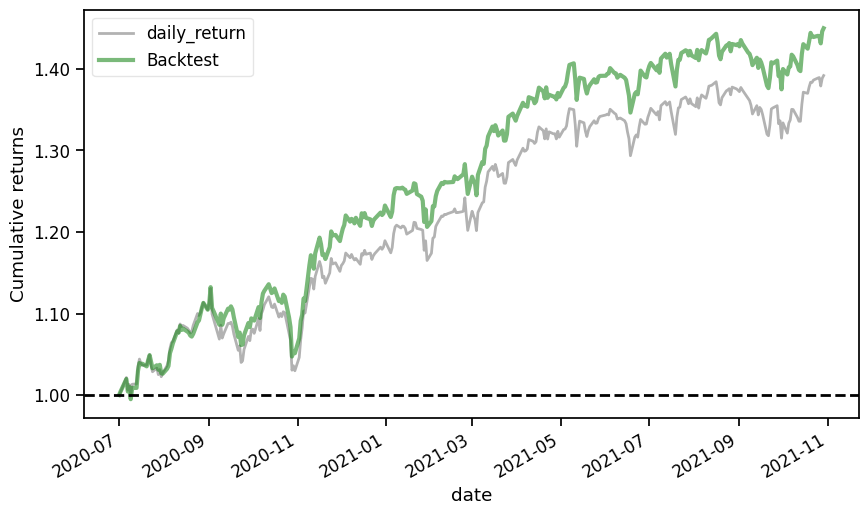

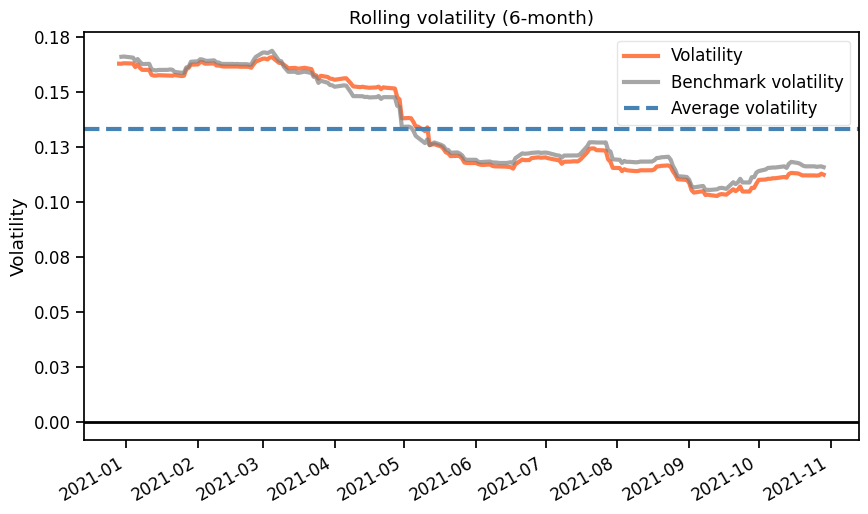

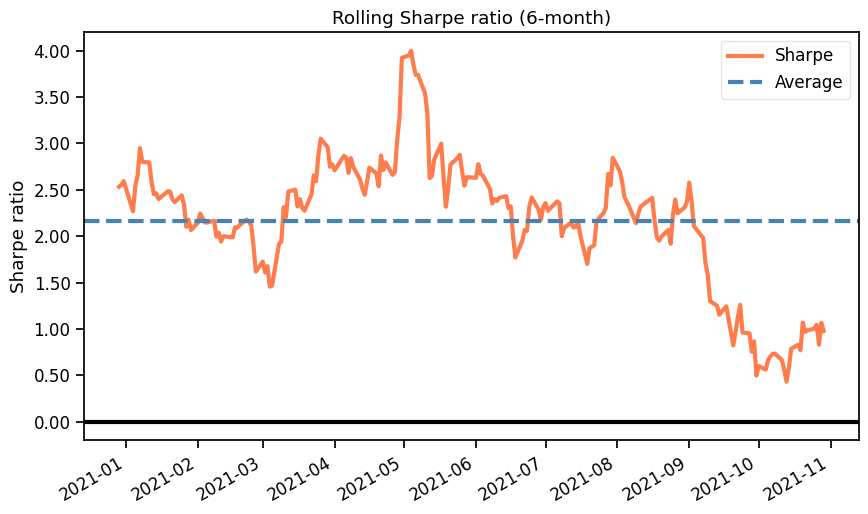

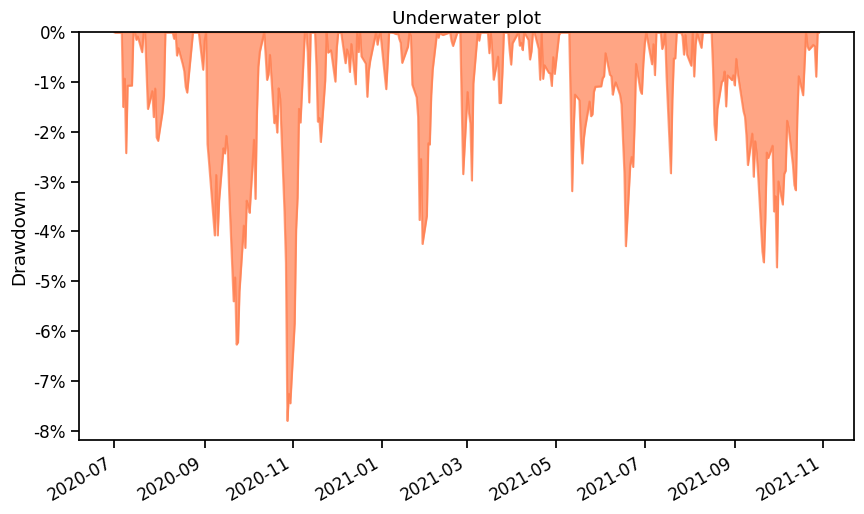

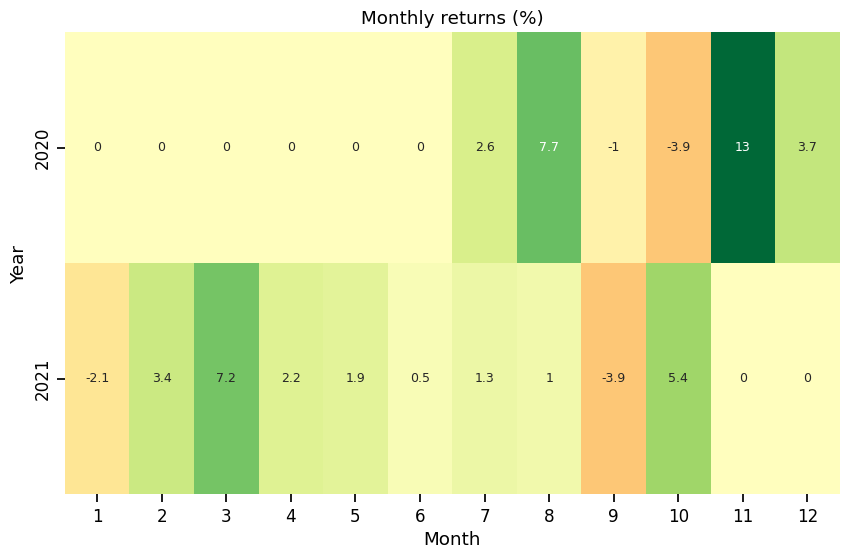

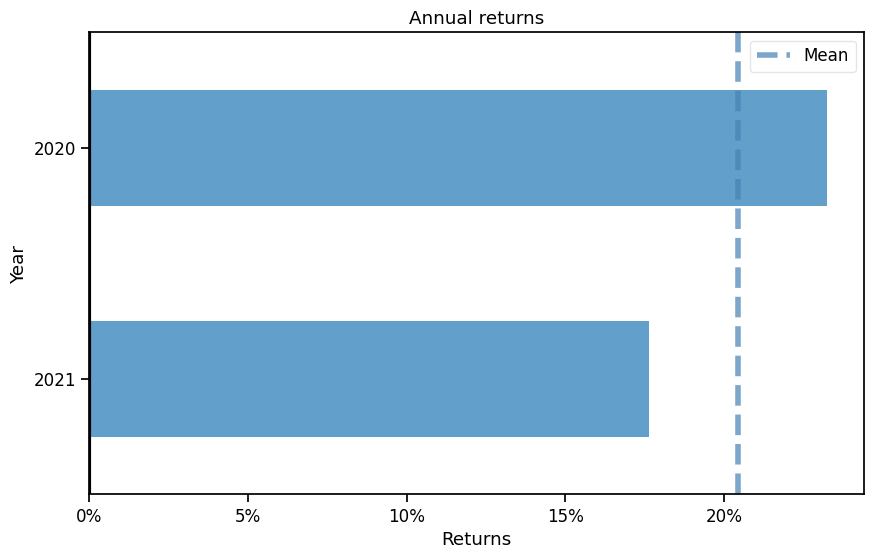

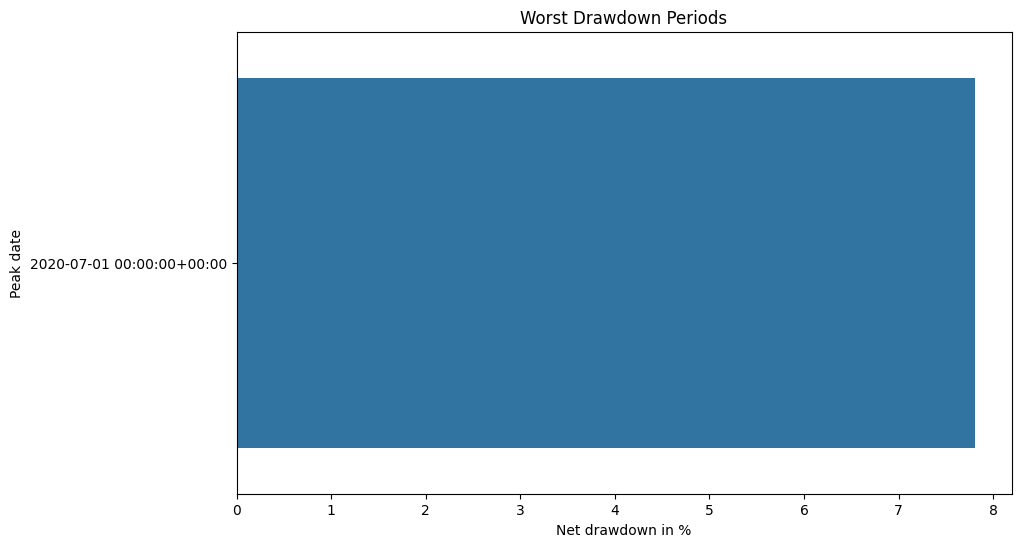

In [179]:
trade = data_split(df,'2020-07-01', '2021-10-31')
e_trade_gym = StockPortfolioEnv(df = trade, **env_kwargs)

trade.shape

df_daily_return, df_actions = DRLAgent.DRL_prediction(model=trained_ddpg,
                        environment = e_trade_gym)

df_daily_return.head()

df_daily_return.to_csv('df_daily_return.csv')

df_actions.head()

df_actions.to_csv('df_actions.csv')

"""<a id='6'></a>
# Part 7: Backtest Our Strategy
Backtesting plays a key role in evaluating the performance of a trading strategy. Automated backtesting tool is preferred because it reduces the human error. We usually use the Quantopian pyfolio package to backtest our trading strategies. It is easy to use and consists of various individual plots that provide a comprehensive image of the performance of a trading strategy.

<a id='6.1'></a>
## 7.1 BackTestStats
pass in df_account_value, this information is stored in env class
"""

from pyfolio import timeseries
DRL_strat = convert_daily_return_to_pyfolio_ts(df_daily_return)
perf_func = timeseries.perf_stats
perf_stats_all = perf_func( returns=DRL_strat,
                              factor_returns=DRL_strat,
                                positions=None, transactions=None, turnover_denom="AGB")

print("==============DRL Strategy Stats===========")
perf_stats_all

#baseline stats
print("==============Get Baseline Stats===========")
baseline_df = get_baseline(
        ticker="^DJI",
        start = df_daily_return.loc[0,'date'],
        end = df_daily_return.loc[len(df_daily_return)-1,'date'])

stats = backtest_stats(baseline_df, value_col_name = 'close')

"""<a id='6.2'></a>
## 7.2 BackTestPlot
"""

import pyfolio

# Commented out IPython magic to ensure Python compatibility.
# %matplotlib inline

baseline_df = get_baseline(
        ticker='^DJI', start=df_daily_return.loc[0,'date'], end='2021-11-01'
    )
baseline_returns = get_daily_return(baseline_df, value_col_name="close")
import pyfolio as pf
import pandas as pd
import numpy as np
import empyrical
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure your data is in the correct format
# Assuming DRL_strat and baseline_returns are your return series

# Convert index to datetime if it's not already
DRL_strat.index = pd.to_datetime(DRL_strat.index)
baseline_returns.index = pd.to_datetime(baseline_returns.index)

# Verify and convert if necessary
if not isinstance(DRL_strat.index, pd.DatetimeIndex):
    DRL_strat.index = pd.to_datetime(DRL_strat.index)

if not isinstance(baseline_returns.index, pd.DatetimeIndex):
    baseline_returns.index = pd.to_datetime(baseline_returns.index)

# Align both series to ensure they have the same dates
DRL_strat = DRL_strat.reindex(baseline_returns.index, method='ffill')
baseline_returns = baseline_returns.reindex(DRL_strat.index, method='ffill')

# Function to calculate drawdowns
def calculate_drawdowns(returns):
    cumulative_returns = empyrical.cum_returns(returns, starting_value=1.0)
    high_water_marks = cumulative_returns.cummax()
    drawdowns = cumulative_returns / high_water_marks - 1
    return drawdowns

# Function to create a drawdown table
def create_drawdown_table(returns, top=10):
    drawdowns = calculate_drawdowns(returns)
    drawdown_periods = []

    peak = 0
    valley = 0
    recovery = np.nan

    for t in range(1, len(drawdowns)):
        if drawdowns.iloc[t] < drawdowns.iloc[valley]:
            valley = t
        if drawdowns.iloc[t] > drawdowns.iloc[peak]:
            peak = t
            valley = t
        if np.isnan(recovery) and drawdowns.iloc[t] == 0:
            recovery = t
        if not np.isnan(recovery):
            drawdown_periods.append((peak, valley, recovery))
            recovery = np.nan  # Reset recovery to find the next one

    drawdown_df = pd.DataFrame(drawdown_periods, columns=['Peak', 'Valley', 'Recovery'])
    drawdown_df['Peak date'] = returns.index[drawdown_df['Peak']]
    drawdown_df['Valley date'] = returns.index[drawdown_df['Valley']]
    drawdown_df['Recovery date'] = returns.index[drawdown_df['Recovery']]
    drawdown_df['Net drawdown in %'] = [drawdowns.iloc[v] * -100 for v in drawdown_df['Valley']]
    drawdown_df = drawdown_df[['Peak date', 'Valley date', 'Recovery date', 'Net drawdown in %']]
    return drawdown_df.sort_values(by='Net drawdown in %', ascending=False).head(top)

# Function to print summary statistics
def print_summary_stats(returns, benchmark_rets):
    perf_stats = pf.timeseries.perf_stats(returns)
    benchmark_perf_stats = pf.timeseries.perf_stats(benchmark_rets)

    print("Start date:", returns.index[0])
    print("End date:", returns.index[-1])
    print("Total months:", len(returns) // 21)  # Approximation
    print("\nBacktest Performance")
    print(perf_stats)
    print("\nBenchmark Performance")
    print(benchmark_perf_stats)

    drawdown_table = create_drawdown_table(returns)
    print("\nWorst drawdown periods")
    print(drawdown_table)

# Define the plots to be generated
def plot_returns(returns, benchmark_rets):
    fig, ax = plt.subplots(figsize=(10, 6))
    pf.plotting.plot_rolling_returns(returns, factor_returns=benchmark_rets, ax=ax)
    plt.show()

def plot_rolling_volatility(returns, benchmark_rets):
    fig, ax = plt.subplots(figsize=(10, 6))
    pf.plotting.plot_rolling_volatility(returns, factor_returns=benchmark_rets, ax=ax)
    plt.show()

def plot_rolling_sharpe(returns):
    fig, ax = plt.subplots(figsize=(10, 6))
    pf.plotting.plot_rolling_sharpe(returns, ax=ax)
    plt.show()

def plot_drawdown_underwater(returns):
    fig, ax = plt.subplots(figsize=(10, 6))
    pf.plotting.plot_drawdown_underwater(returns, ax=ax)
    plt.show()

def plot_monthly_returns_heatmap(returns):
    fig, ax = plt.subplots(figsize=(10, 6))
    pf.plotting.plot_monthly_returns_heatmap(returns, ax=ax)
    plt.show()

def plot_annual_returns(returns):
    fig, ax = plt.subplots(figsize=(10, 6))
    pf.plotting.plot_annual_returns(returns, ax=ax)
    plt.show()

# Print summary statistics
print_summary_stats(DRL_strat, baseline_returns)

# Manually create the full tear sheet except the problematic plots
with pf.plotting.plotting_context(font_scale=1.1):
    plot_returns(DRL_strat, baseline_returns)
    plot_rolling_volatility(DRL_strat, baseline_returns)
    plot_rolling_sharpe(DRL_strat)
    plot_drawdown_underwater(DRL_strat)
    plot_monthly_returns_heatmap(DRL_strat)
    plot_annual_returns(DRL_strat)

# Manually create the drawdown plot
drawdown_table = create_drawdown_table(DRL_strat)

plt.figure(figsize=(10, 6))
sns.barplot(x='Net drawdown in %', y='Peak date', data=drawdown_table)
plt.title('Worst Drawdown Periods')
plt.xlabel('Net drawdown in %')
plt.ylabel('Peak date')
plt.show()

"""## Min-Variance Portfolio Allocation"""

# Commented out IPython magic to ensure Python compatibility.
# %pip install PyPortfolioOpt

from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models

unique_tic = trade.tic.unique()
unique_trade_date = trade.date.unique()

df.head()

#calculate_portfolio_minimum_variance
portfolio = pd.DataFrame(index = range(1), columns = unique_trade_date)
initial_capital = 1000000
portfolio.loc[0,unique_trade_date[0]] = initial_capital

for i in range(len( unique_trade_date)-1):
    df_temp = df[df.date==unique_trade_date[i]].reset_index(drop=True)
    df_temp_next = df[df.date==unique_trade_date[i+1]].reset_index(drop=True)
    #Sigma = risk_models.sample_cov(df_temp.return_list[0])
    #calculate covariance matrix
    Sigma = df_temp.return_list[0].cov()
    #portfolio allocation
    ef_min_var = EfficientFrontier(None, Sigma,weight_bounds=(0, 0.1))
    #minimum variance
    raw_weights_min_var = ef_min_var.min_volatility()
    #get weights
    cleaned_weights_min_var = ef_min_var.clean_weights()

    #current capital
    cap = portfolio.iloc[0, i]
    #current cash invested for each stock
    current_cash = [element * cap for element in list(cleaned_weights_min_var.values())]
    # current held shares
    current_shares = list(np.array(current_cash)
                                      / np.array(df_temp.close))
    # next time period price
    next_price = np.array(df_temp_next.close)
    ##next_price * current share to calculate next total account value
    portfolio.iloc[0, i+1] = np.dot(current_shares, next_price)

portfolio=portfolio.T
portfolio.columns = ['account_value']

portfolio.head()

a2c_cumpod =(df_daily_return.daily_return+1).cumprod()-1

min_var_cumpod =(portfolio.account_value.pct_change()+1).cumprod()-1

dji_cumpod =(baseline_returns+1).cumprod()-1

"""## Plotly: DRL, Min-Variance, DJIA"""

# Commented out IPython magic to ensure Python compatibility.
# %pip install plotly

from datetime import datetime as dt

import matplotlib.pyplot as plt
import plotly
import plotly.graph_objs as go

time_ind = pd.Series(df_daily_return.date)

trace0_portfolio = go.Scatter(x = time_ind, y = a2c_cumpod, mode = 'lines', name = 'DDPG (Portfolio Allocation)')

trace1_portfolio = go.Scatter(x = time_ind, y = dji_cumpod, mode = 'lines', name = 'DJIA')
trace2_portfolio = go.Scatter(x = time_ind, y = min_var_cumpod, mode = 'lines', name = 'Min-Variance')
#trace3_portfolio = go.Scatter(x = time_ind, y = ddpg_cumpod, mode = 'lines', name = 'DDPG')
#trace4_portfolio = go.Scatter(x = time_ind, y = addpg_cumpod, mode = 'lines', name = 'Adaptive-DDPG')
#trace5_portfolio = go.Scatter(x = time_ind, y = min_cumpod, mode = 'lines', name = 'Min-Variance')

#trace4 = go.Scatter(x = time_ind, y = addpg_cumpod, mode = 'lines', name = 'Adaptive-DDPG')

#trace2 = go.Scatter(x = time_ind, y = portfolio_cost_minv, mode = 'lines', name = 'Min-Variance')
#trace3 = go.Scatter(x = time_ind, y = spx_value, mode = 'lines', name = 'SPX')

fig = go.Figure()
fig.add_trace(trace0_portfolio)

fig.add_trace(trace1_portfolio)

fig.add_trace(trace2_portfolio)



fig.update_layout(
    legend=dict(
        x=0,
        y=1,
        traceorder="normal",
        font=dict(
            family="sans-serif",
            size=15,
            color="black"
        ),
        bgcolor="White",
        bordercolor="white",
        borderwidth=2

    ),
)
#fig.update_layout(legend_orientation="h")
fig.update_layout(title={
        #'text': "Cumulative Return using FinRL",
        'y':0.85,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
#with Transaction cost
#fig.update_layout(title =  'Quarterly Trade Date')
fig.update_layout(
#    margin=dict(l=20, r=20, t=20, b=20),

    paper_bgcolor='rgba(1,1,0,0)',
    plot_bgcolor='rgba(1, 1, 0, 0)',
    #xaxis_title="Date",
    yaxis_title="Cumulative Return",
xaxis={'type': 'date',
       'tick0': time_ind[0],
        'tickmode': 'linear',
       'dtick': 86400000.0 *80}

)
fig.update_xaxes(showline=True,linecolor='black',showgrid=True, gridwidth=1, gridcolor='LightSteelBlue',mirror=True)
fig.update_yaxes(showline=True,linecolor='black',showgrid=True, gridwidth=1, gridcolor='LightSteelBlue',mirror=True)
fig.update_yaxes(zeroline=True, zerolinewidth=1, zerolinecolor='LightSteelBlue')

fig.show()



# SAC

[*********************100%%**********************]  1 of 1 completed

begin_total_asset:1000000
end_total_asset:1421786.734183398
Sharpe:  1.9373170348458368
hit end!
==============DRL Strategy Stats===========
==============Get Baseline Stats===========
Shape of DataFrame:  (336, 8)
Annual return          0.279047
Cumulative returns     0.388402
Annual volatility      0.139129
Sharpe ratio           1.844560
Calmar ratio           3.124551
Stability              0.918675
Max drawdown          -0.089308
Omega ratio            1.358960
Sortino ratio          2.734872
Skew                        NaN
Kurtosis                    NaN
Tail ratio             1.052781
Daily value at risk   -0.016510
dtype: float64



[*********************100%%**********************]  1 of 1 completed


Shape of DataFrame:  (337, 8)
Start date: 2020-07-01 00:00:00+00:00
End date: 2021-10-29 00:00:00+00:00
Total months: 16

Backtest Performance
Annual return          0.301025
Cumulative returns     0.421787
Annual volatility      0.141015
Sharpe ratio           1.937317
Calmar ratio           3.388293
Stability              0.908055
Max drawdown          -0.088843
Omega ratio            1.383998
Sortino ratio          2.988425
Skew                   0.054184
Kurtosis               2.069702
Tail ratio             1.073566
Daily value at risk   -0.016682
dtype: float64

Benchmark Performance
Annual return          0.280495
Cumulative returns     0.391863
Annual volatility      0.138927
Sharpe ratio           1.855203
Calmar ratio           3.140767
Stability              0.918753
Max drawdown          -0.089308
Omega ratio            1.361583
Sortino ratio          2.750755
Skew                        NaN
Kurtosis                    NaN
Tail ratio             1.053708
Daily value at risk

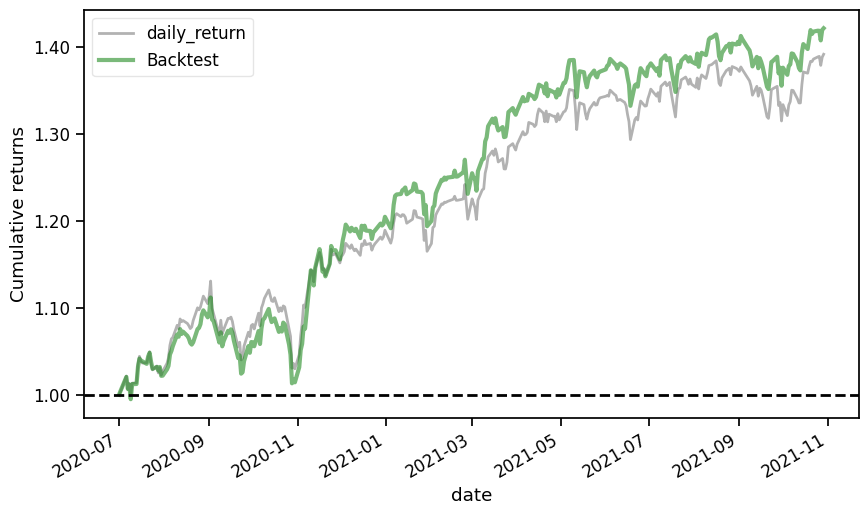

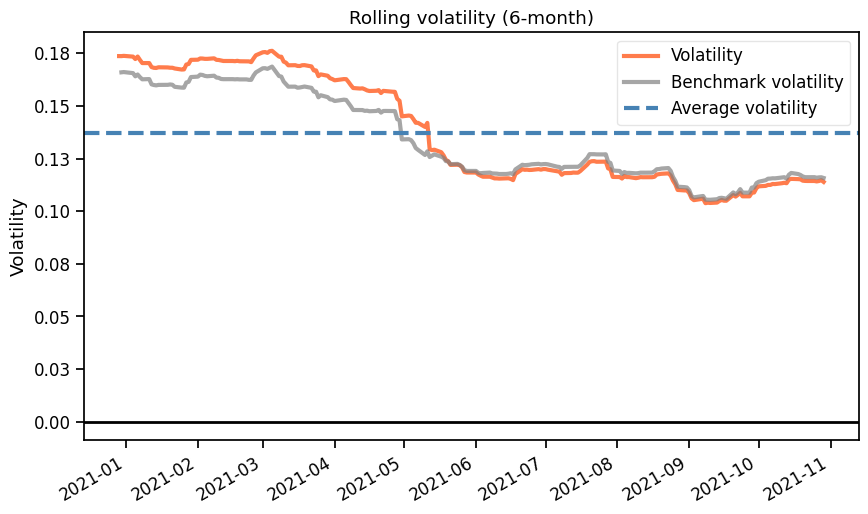

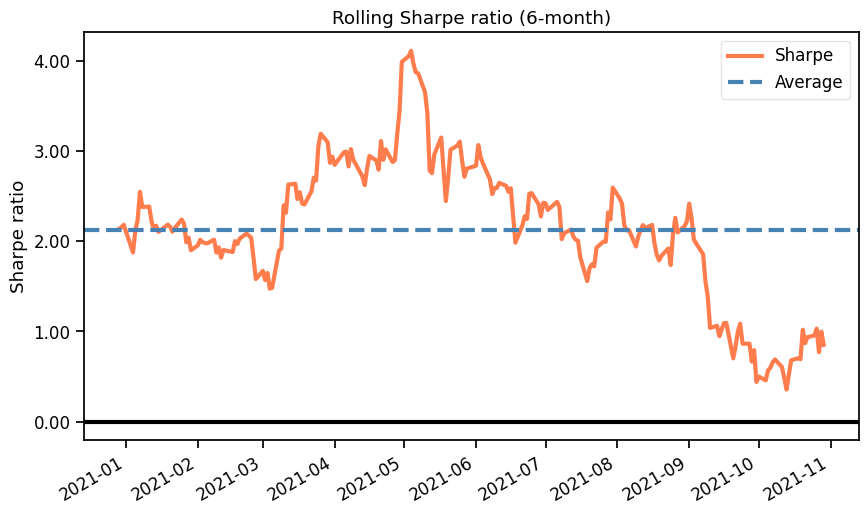

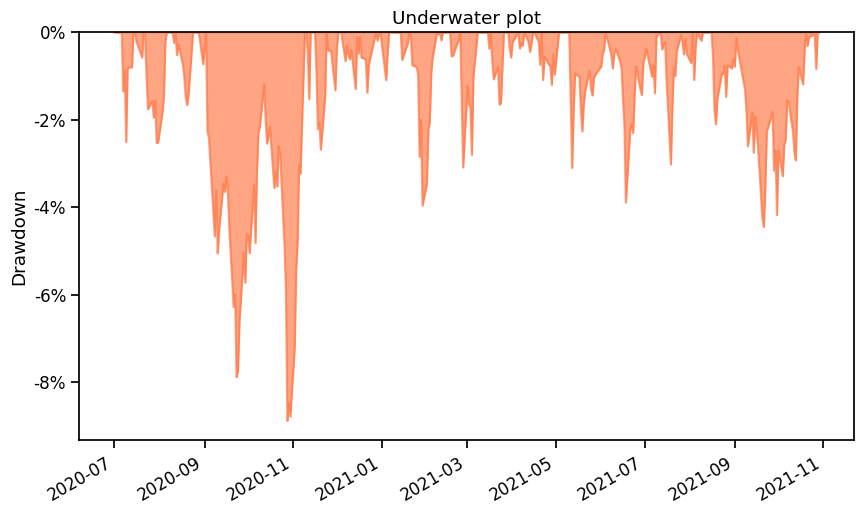

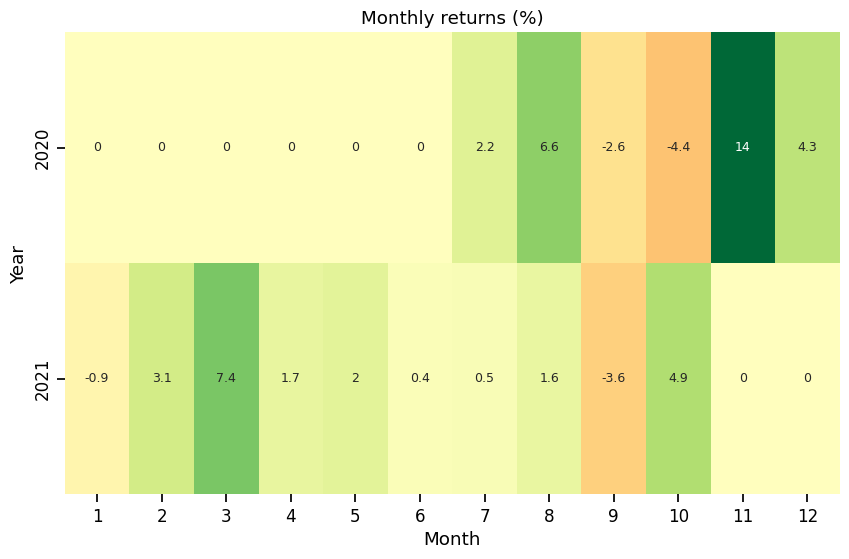

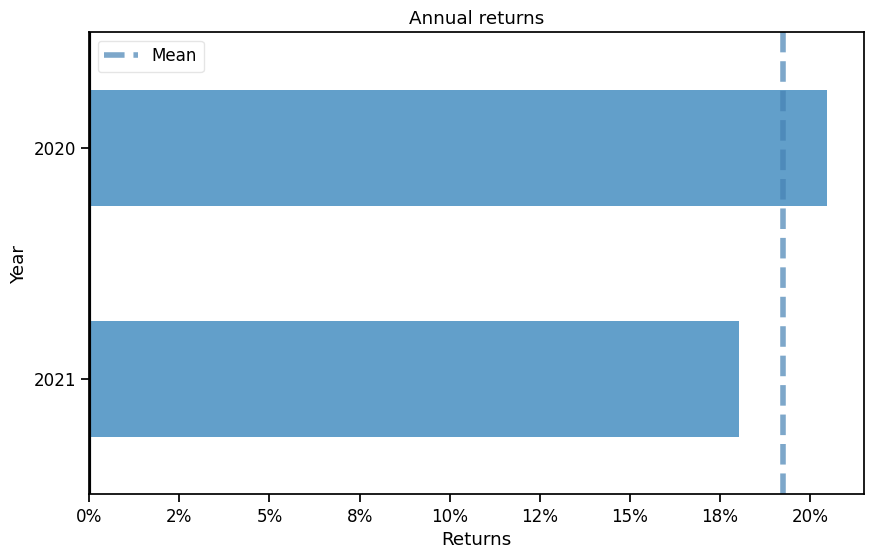

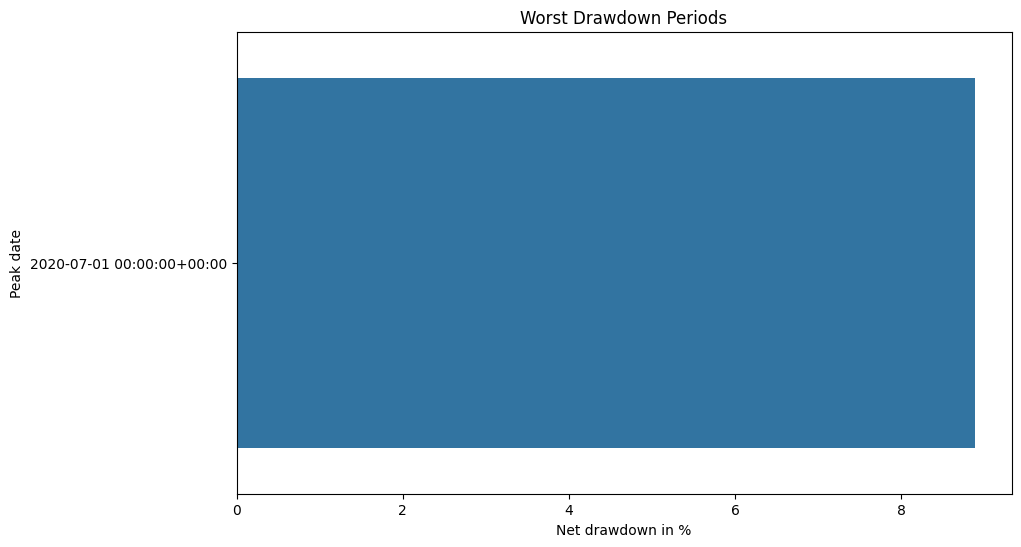

In [185]:
trade = data_split(df,'2020-07-01', '2021-10-31')
e_trade_gym = StockPortfolioEnv(df = trade, **env_kwargs)

trade.shape

df_daily_return, df_actions = DRLAgent.DRL_prediction(model=trained_sac,
                        environment = e_trade_gym)

df_daily_return.head()

df_daily_return.to_csv('df_daily_return.csv')

df_actions.head()

df_actions.to_csv('df_actions.csv')

"""<a id='6'></a>
# Part 7: Backtest Our Strategy
Backtesting plays a key role in evaluating the performance of a trading strategy. Automated backtesting tool is preferred because it reduces the human error. We usually use the Quantopian pyfolio package to backtest our trading strategies. It is easy to use and consists of various individual plots that provide a comprehensive image of the performance of a trading strategy.

<a id='6.1'></a>
## 7.1 BackTestStats
pass in df_account_value, this information is stored in env class
"""

from pyfolio import timeseries
DRL_strat = convert_daily_return_to_pyfolio_ts(df_daily_return)
perf_func = timeseries.perf_stats
perf_stats_all = perf_func( returns=DRL_strat,
                              factor_returns=DRL_strat,
                                positions=None, transactions=None, turnover_denom="AGB")

print("==============DRL Strategy Stats===========")
perf_stats_all

#baseline stats
print("==============Get Baseline Stats===========")
baseline_df = get_baseline(
        ticker="^DJI",
        start = df_daily_return.loc[0,'date'],
        end = df_daily_return.loc[len(df_daily_return)-1,'date'])

stats = backtest_stats(baseline_df, value_col_name = 'close')

"""<a id='6.2'></a>
## 7.2 BackTestPlot
"""

import pyfolio

# Commented out IPython magic to ensure Python compatibility.
# %matplotlib inline

baseline_df = get_baseline(
        ticker='^DJI', start=df_daily_return.loc[0,'date'], end='2021-11-01'
    )
baseline_returns = get_daily_return(baseline_df, value_col_name="close")

import pyfolio as pf
import pandas as pd
import numpy as np
import empyrical
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure your data is in the correct format
# Assuming DRL_strat and baseline_returns are your return series

# Convert index to datetime if it's not already
DRL_strat.index = pd.to_datetime(DRL_strat.index)
baseline_returns.index = pd.to_datetime(baseline_returns.index)

# Verify and convert if necessary
if not isinstance(DRL_strat.index, pd.DatetimeIndex):
    DRL_strat.index = pd.to_datetime(DRL_strat.index)

if not isinstance(baseline_returns.index, pd.DatetimeIndex):
    baseline_returns.index = pd.to_datetime(baseline_returns.index)

# Align both series to ensure they have the same dates
DRL_strat = DRL_strat.reindex(baseline_returns.index, method='ffill')
baseline_returns = baseline_returns.reindex(DRL_strat.index, method='ffill')

# Function to calculate drawdowns
def calculate_drawdowns(returns):
    cumulative_returns = empyrical.cum_returns(returns, starting_value=1.0)
    high_water_marks = cumulative_returns.cummax()
    drawdowns = cumulative_returns / high_water_marks - 1
    return drawdowns

# Function to create a drawdown table
def create_drawdown_table(returns, top=10):
    drawdowns = calculate_drawdowns(returns)
    drawdown_periods = []

    peak = 0
    valley = 0
    recovery = np.nan

    for t in range(1, len(drawdowns)):
        if drawdowns.iloc[t] < drawdowns.iloc[valley]:
            valley = t
        if drawdowns.iloc[t] > drawdowns.iloc[peak]:
            peak = t
            valley = t
        if np.isnan(recovery) and drawdowns.iloc[t] == 0:
            recovery = t
        if not np.isnan(recovery):
            drawdown_periods.append((peak, valley, recovery))
            recovery = np.nan  # Reset recovery to find the next one

    drawdown_df = pd.DataFrame(drawdown_periods, columns=['Peak', 'Valley', 'Recovery'])
    drawdown_df['Peak date'] = returns.index[drawdown_df['Peak']]
    drawdown_df['Valley date'] = returns.index[drawdown_df['Valley']]
    drawdown_df['Recovery date'] = returns.index[drawdown_df['Recovery']]
    drawdown_df['Net drawdown in %'] = [drawdowns.iloc[v] * -100 for v in drawdown_df['Valley']]
    drawdown_df = drawdown_df[['Peak date', 'Valley date', 'Recovery date', 'Net drawdown in %']]
    return drawdown_df.sort_values(by='Net drawdown in %', ascending=False).head(top)

# Function to print summary statistics
def print_summary_stats(returns, benchmark_rets):
    perf_stats = pf.timeseries.perf_stats(returns)
    benchmark_perf_stats = pf.timeseries.perf_stats(benchmark_rets)

    print("Start date:", returns.index[0])
    print("End date:", returns.index[-1])
    print("Total months:", len(returns) // 21)  # Approximation
    print("\nBacktest Performance")
    print(perf_stats)
    print("\nBenchmark Performance")
    print(benchmark_perf_stats)

    drawdown_table = create_drawdown_table(returns)
    print("\nWorst drawdown periods")
    print(drawdown_table)

# Define the plots to be generated
def plot_returns(returns, benchmark_rets):
    fig, ax = plt.subplots(figsize=(10, 6))
    pf.plotting.plot_rolling_returns(returns, factor_returns=benchmark_rets, ax=ax)
    plt.show()

def plot_rolling_volatility(returns, benchmark_rets):
    fig, ax = plt.subplots(figsize=(10, 6))
    pf.plotting.plot_rolling_volatility(returns, factor_returns=benchmark_rets, ax=ax)
    plt.show()

def plot_rolling_sharpe(returns):
    fig, ax = plt.subplots(figsize=(10, 6))
    pf.plotting.plot_rolling_sharpe(returns, ax=ax)
    plt.show()

def plot_drawdown_underwater(returns):
    fig, ax = plt.subplots(figsize=(10, 6))
    pf.plotting.plot_drawdown_underwater(returns, ax=ax)
    plt.show()

def plot_monthly_returns_heatmap(returns):
    fig, ax = plt.subplots(figsize=(10, 6))
    pf.plotting.plot_monthly_returns_heatmap(returns, ax=ax)
    plt.show()

def plot_annual_returns(returns):
    fig, ax = plt.subplots(figsize=(10, 6))
    pf.plotting.plot_annual_returns(returns, ax=ax)
    plt.show()

# Print summary statistics
print_summary_stats(DRL_strat, baseline_returns)

# Manually create the full tear sheet except the problematic plots
with pf.plotting.plotting_context(font_scale=1.1):
    plot_returns(DRL_strat, baseline_returns)
    plot_rolling_volatility(DRL_strat, baseline_returns)
    plot_rolling_sharpe(DRL_strat)
    plot_drawdown_underwater(DRL_strat)
    plot_monthly_returns_heatmap(DRL_strat)
    plot_annual_returns(DRL_strat)

# Manually create the drawdown plot
drawdown_table = create_drawdown_table(DRL_strat)

plt.figure(figsize=(10, 6))
sns.barplot(x='Net drawdown in %', y='Peak date', data=drawdown_table)
plt.title('Worst Drawdown Periods')
plt.xlabel('Net drawdown in %')
plt.ylabel('Peak date')
plt.show()

"""## Min-Variance Portfolio Allocation"""

# Commented out IPython magic to ensure Python compatibility.
# %pip install PyPortfolioOpt

from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models

unique_tic = trade.tic.unique()
unique_trade_date = trade.date.unique()

df.head()

#calculate_portfolio_minimum_variance
portfolio = pd.DataFrame(index = range(1), columns = unique_trade_date)
initial_capital = 1000000
portfolio.loc[0,unique_trade_date[0]] = initial_capital

for i in range(len( unique_trade_date)-1):
    df_temp = df[df.date==unique_trade_date[i]].reset_index(drop=True)
    df_temp_next = df[df.date==unique_trade_date[i+1]].reset_index(drop=True)
    #Sigma = risk_models.sample_cov(df_temp.return_list[0])
    #calculate covariance matrix
    Sigma = df_temp.return_list[0].cov()
    #portfolio allocation
    ef_min_var = EfficientFrontier(None, Sigma,weight_bounds=(0, 0.1))
    #minimum variance
    raw_weights_min_var = ef_min_var.min_volatility()
    #get weights
    cleaned_weights_min_var = ef_min_var.clean_weights()

    #current capital
    cap = portfolio.iloc[0, i]
    #current cash invested for each stock
    current_cash = [element * cap for element in list(cleaned_weights_min_var.values())]
    # current held shares
    current_shares = list(np.array(current_cash)
                                      / np.array(df_temp.close))
    # next time period price
    next_price = np.array(df_temp_next.close)
    ##next_price * current share to calculate next total account value
    portfolio.iloc[0, i+1] = np.dot(current_shares, next_price)

portfolio=portfolio.T
portfolio.columns = ['account_value']

portfolio.head()

a2c_cumpod =(df_daily_return.daily_return+1).cumprod()-1

min_var_cumpod =(portfolio.account_value.pct_change()+1).cumprod()-1

dji_cumpod =(baseline_returns+1).cumprod()-1

"""## Plotly: DRL, Min-Variance, DJIA"""

# Commented out IPython magic to ensure Python compatibility.
# %pip install plotly

from datetime import datetime as dt

import matplotlib.pyplot as plt
import plotly
import plotly.graph_objs as go

time_ind = pd.Series(df_daily_return.date)

trace0_portfolio = go.Scatter(x = time_ind, y = a2c_cumpod, mode = 'lines', name = 'SAC (Portfolio Allocation)')

trace1_portfolio = go.Scatter(x = time_ind, y = dji_cumpod, mode = 'lines', name = 'DJIA')
trace2_portfolio = go.Scatter(x = time_ind, y = min_var_cumpod, mode = 'lines', name = 'Min-Variance')
#trace3_portfolio = go.Scatter(x = time_ind, y = ddpg_cumpod, mode = 'lines', name = 'DDPG')
#trace4_portfolio = go.Scatter(x = time_ind, y = addpg_cumpod, mode = 'lines', name = 'Adaptive-DDPG')
#trace5_portfolio = go.Scatter(x = time_ind, y = min_cumpod, mode = 'lines', name = 'Min-Variance')

#trace4 = go.Scatter(x = time_ind, y = addpg_cumpod, mode = 'lines', name = 'Adaptive-DDPG')

#trace2 = go.Scatter(x = time_ind, y = portfolio_cost_minv, mode = 'lines', name = 'Min-Variance')
#trace3 = go.Scatter(x = time_ind, y = spx_value, mode = 'lines', name = 'SPX')

fig = go.Figure()
fig.add_trace(trace0_portfolio)

fig.add_trace(trace1_portfolio)

fig.add_trace(trace2_portfolio)



fig.update_layout(
    legend=dict(
        x=0,
        y=1,
        traceorder="normal",
        font=dict(
            family="sans-serif",
            size=15,
            color="black"
        ),
        bgcolor="White",
        bordercolor="white",
        borderwidth=2

    ),
)
#fig.update_layout(legend_orientation="h")
fig.update_layout(title={
        #'text': "Cumulative Return using FinRL",
        'y':0.85,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
#with Transaction cost
#fig.update_layout(title =  'Quarterly Trade Date')
fig.update_layout(
#    margin=dict(l=20, r=20, t=20, b=20),

    paper_bgcolor='rgba(1,1,0,0)',
    plot_bgcolor='rgba(1, 1, 0, 0)',
    #xaxis_title="Date",
    yaxis_title="Cumulative Return",
xaxis={'type': 'date',
       'tick0': time_ind[0],
        'tickmode': 'linear',
       'dtick': 86400000.0 *80}

)
fig.update_xaxes(showline=True,linecolor='black',showgrid=True, gridwidth=1, gridcolor='LightSteelBlue',mirror=True)
fig.update_yaxes(showline=True,linecolor='black',showgrid=True, gridwidth=1, gridcolor='LightSteelBlue',mirror=True)
fig.update_yaxes(zeroline=True, zerolinewidth=1, zerolinecolor='LightSteelBlue')

fig.show()



# TD3

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

begin_total_asset:1000000
end_total_asset:1429901.8472770876
Sharpe:  1.9977031402760035
hit end!
==============DRL Strategy Stats===========
==============Get Baseline Stats===========
Shape of DataFrame:  (336, 8)
Annual return          0.279047
Cumulative returns     0.388402
Annual volatility      0.139129
Sharpe ratio           1.844560
Calmar ratio           3.124551
Stability              0.918675
Max drawdown          -0.089308
Omega ratio            1.358960
Sortino ratio          2.734872
Skew                        NaN
Kurtosis                    NaN
Tail ratio             1.052781
Daily value at risk   -0.016510
dtype: float64
Shape of DataFrame: 

 (337, 8)
Start date: 2020-07-01 00:00:00+00:00
End date: 2021-10-29 00:00:00+00:00
Total months: 16

Backtest Performance
Annual return          0.306574
Cumulative returns     0.429902
Annual volatility      0.138730
Sharpe ratio           1.997703
Calmar ratio           3.931089
Stability              0.918874
Max drawdown          -0.077987
Omega ratio            1.393915
Sortino ratio          3.066713
Skew                  -0.118815
Kurtosis               0.990058
Tail ratio             1.115579
Daily value at risk   -0.016379
dtype: float64

Benchmark Performance
Annual return          0.280495
Cumulative returns     0.391863
Annual volatility      0.138927
Sharpe ratio           1.855203
Calmar ratio           3.140767
Stability              0.918753
Max drawdown          -0.089308
Omega ratio            1.361583
Sortino ratio          2.750755
Skew                        NaN
Kurtosis                    NaN
Tail ratio             1.053708
Daily value at risk   -0.016480
dtype: 

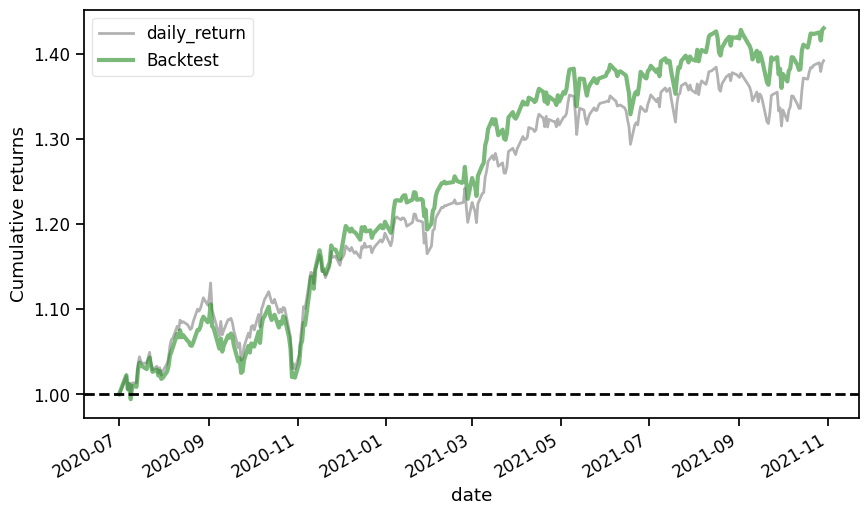

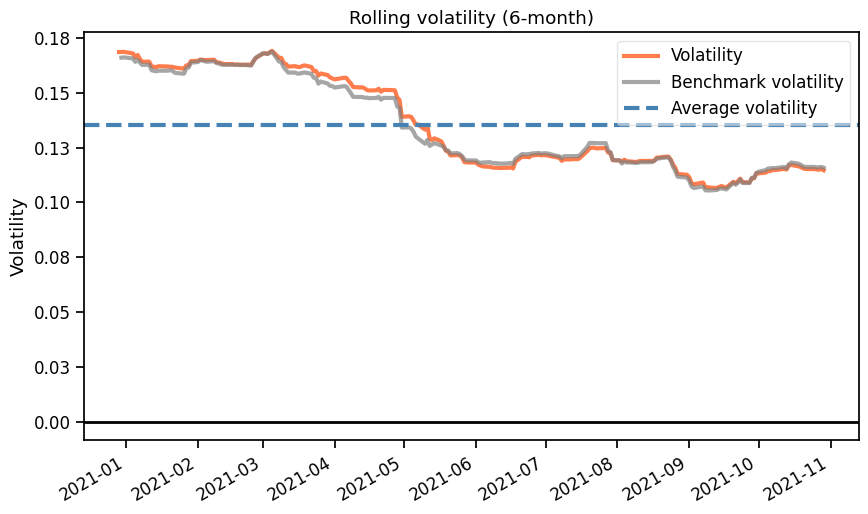

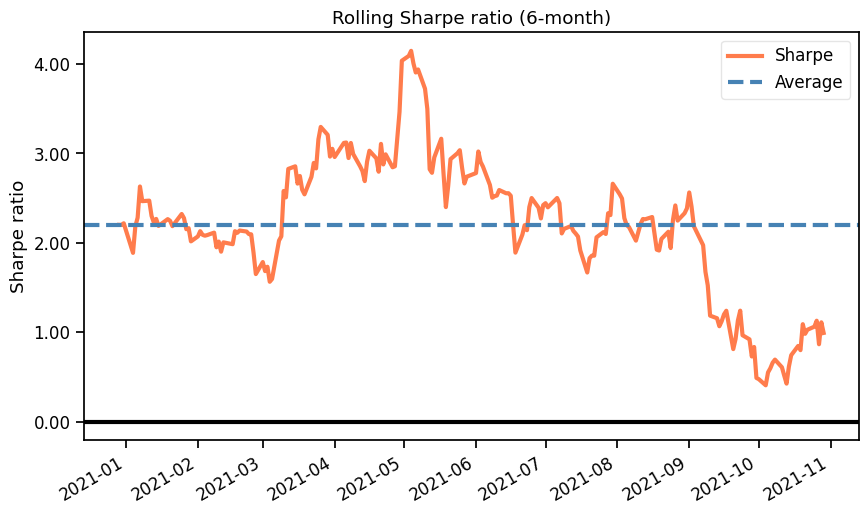

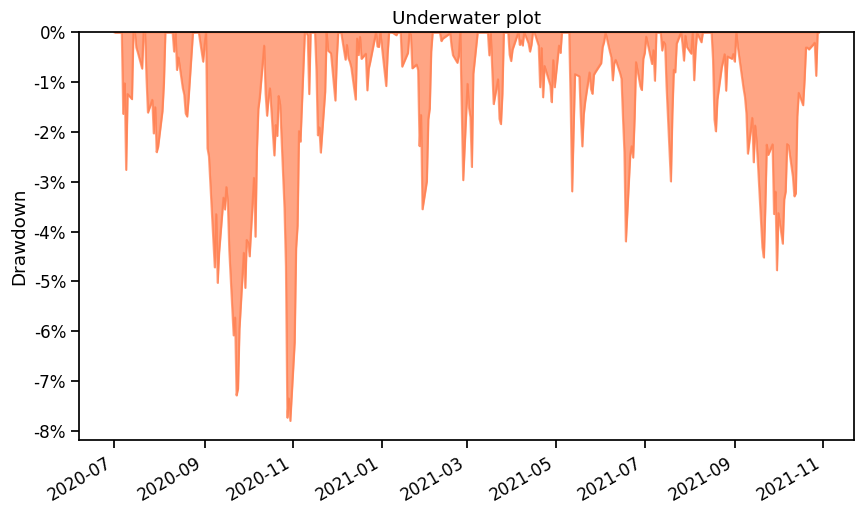

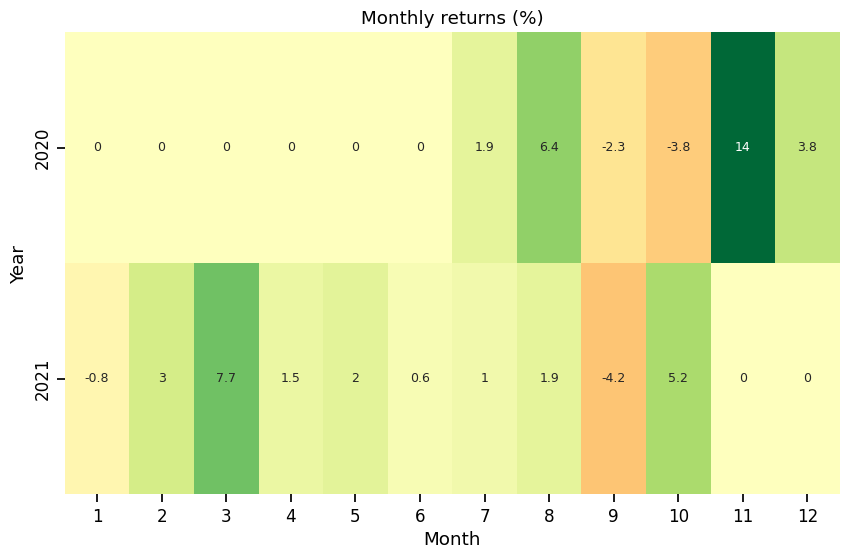

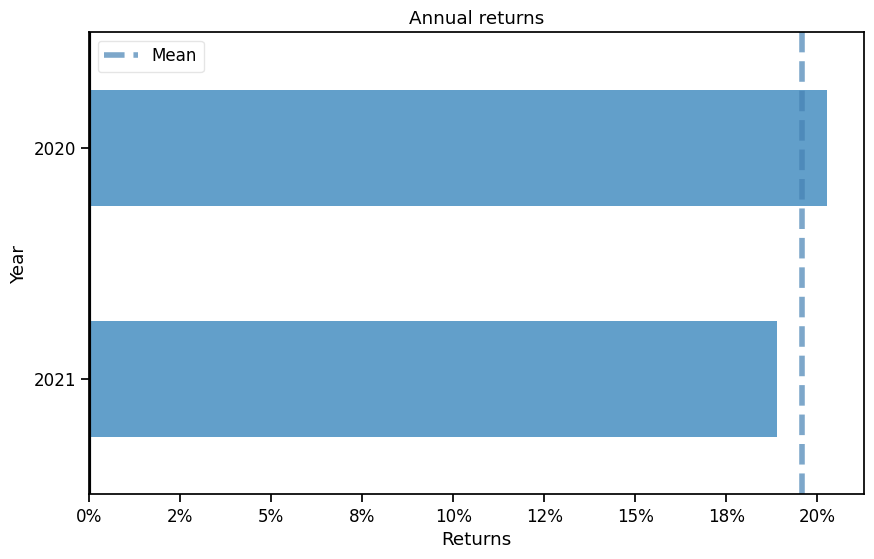

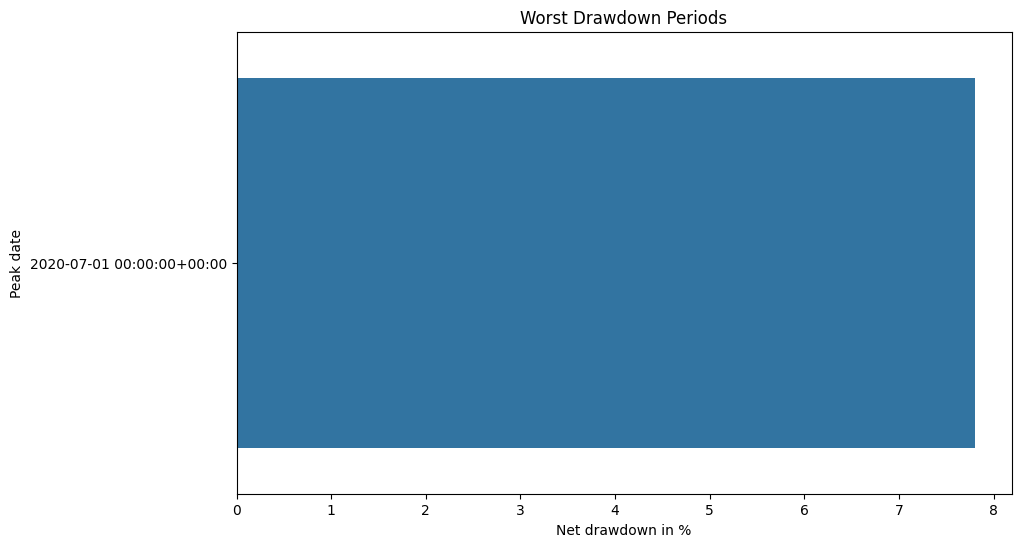

In [188]:
trade = data_split(df,'2020-07-01', '2021-10-31')
e_trade_gym = StockPortfolioEnv(df = trade, **env_kwargs)

trade.shape

df_daily_return, df_actions = DRLAgent.DRL_prediction(model=trained_td3,
                        environment = e_trade_gym)

df_daily_return.head()

df_daily_return.to_csv('df_daily_return.csv')

df_actions.head()

df_actions.to_csv('df_actions.csv')

"""<a id='6'></a>
# Part 7: Backtest Our Strategy
Backtesting plays a key role in evaluating the performance of a trading strategy. Automated backtesting tool is preferred because it reduces the human error. We usually use the Quantopian pyfolio package to backtest our trading strategies. It is easy to use and consists of various individual plots that provide a comprehensive image of the performance of a trading strategy.

<a id='6.1'></a>
## 7.1 BackTestStats
pass in df_account_value, this information is stored in env class
"""

from pyfolio import timeseries
DRL_strat = convert_daily_return_to_pyfolio_ts(df_daily_return)
perf_func = timeseries.perf_stats
perf_stats_all = perf_func( returns=DRL_strat,
                              factor_returns=DRL_strat,
                                positions=None, transactions=None, turnover_denom="AGB")

print("==============DRL Strategy Stats===========")
perf_stats_all

#baseline stats
print("==============Get Baseline Stats===========")
baseline_df = get_baseline(
        ticker="^DJI",
        start = df_daily_return.loc[0,'date'],
        end = df_daily_return.loc[len(df_daily_return)-1,'date'])

stats = backtest_stats(baseline_df, value_col_name = 'close')

"""<a id='6.2'></a>
## 7.2 BackTestPlot
"""

import pyfolio

# Commented out IPython magic to ensure Python compatibility.
# %matplotlib inline

baseline_df = get_baseline(
        ticker='^DJI', start=df_daily_return.loc[0,'date'], end='2021-11-01'
    )
baseline_returns = get_daily_return(baseline_df, value_col_name="close")

import pyfolio as pf
import pandas as pd
import numpy as np
import empyrical
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure your data is in the correct format
# Assuming DRL_strat and baseline_returns are your return series

# Convert index to datetime if it's not already
DRL_strat.index = pd.to_datetime(DRL_strat.index)
baseline_returns.index = pd.to_datetime(baseline_returns.index)

# Verify and convert if necessary
if not isinstance(DRL_strat.index, pd.DatetimeIndex):
    DRL_strat.index = pd.to_datetime(DRL_strat.index)

if not isinstance(baseline_returns.index, pd.DatetimeIndex):
    baseline_returns.index = pd.to_datetime(baseline_returns.index)

# Align both series to ensure they have the same dates
DRL_strat = DRL_strat.reindex(baseline_returns.index, method='ffill')
baseline_returns = baseline_returns.reindex(DRL_strat.index, method='ffill')

# Function to calculate drawdowns
def calculate_drawdowns(returns):
    cumulative_returns = empyrical.cum_returns(returns, starting_value=1.0)
    high_water_marks = cumulative_returns.cummax()
    drawdowns = cumulative_returns / high_water_marks - 1
    return drawdowns

# Function to create a drawdown table
def create_drawdown_table(returns, top=10):
    drawdowns = calculate_drawdowns(returns)
    drawdown_periods = []

    peak = 0
    valley = 0
    recovery = np.nan

    for t in range(1, len(drawdowns)):
        if drawdowns.iloc[t] < drawdowns.iloc[valley]:
            valley = t
        if drawdowns.iloc[t] > drawdowns.iloc[peak]:
            peak = t
            valley = t
        if np.isnan(recovery) and drawdowns.iloc[t] == 0:
            recovery = t
        if not np.isnan(recovery):
            drawdown_periods.append((peak, valley, recovery))
            recovery = np.nan  # Reset recovery to find the next one

    drawdown_df = pd.DataFrame(drawdown_periods, columns=['Peak', 'Valley', 'Recovery'])
    drawdown_df['Peak date'] = returns.index[drawdown_df['Peak']]
    drawdown_df['Valley date'] = returns.index[drawdown_df['Valley']]
    drawdown_df['Recovery date'] = returns.index[drawdown_df['Recovery']]
    drawdown_df['Net drawdown in %'] = [drawdowns.iloc[v] * -100 for v in drawdown_df['Valley']]
    drawdown_df = drawdown_df[['Peak date', 'Valley date', 'Recovery date', 'Net drawdown in %']]
    return drawdown_df.sort_values(by='Net drawdown in %', ascending=False).head(top)

# Function to print summary statistics
def print_summary_stats(returns, benchmark_rets):
    perf_stats = pf.timeseries.perf_stats(returns)
    benchmark_perf_stats = pf.timeseries.perf_stats(benchmark_rets)

    print("Start date:", returns.index[0])
    print("End date:", returns.index[-1])
    print("Total months:", len(returns) // 21)  # Approximation
    print("\nBacktest Performance")
    print(perf_stats)
    print("\nBenchmark Performance")
    print(benchmark_perf_stats)

    drawdown_table = create_drawdown_table(returns)
    print("\nWorst drawdown periods")
    print(drawdown_table)

# Define the plots to be generated
def plot_returns(returns, benchmark_rets):
    fig, ax = plt.subplots(figsize=(10, 6))
    pf.plotting.plot_rolling_returns(returns, factor_returns=benchmark_rets, ax=ax)
    plt.show()

def plot_rolling_volatility(returns, benchmark_rets):
    fig, ax = plt.subplots(figsize=(10, 6))
    pf.plotting.plot_rolling_volatility(returns, factor_returns=benchmark_rets, ax=ax)
    plt.show()

def plot_rolling_sharpe(returns):
    fig, ax = plt.subplots(figsize=(10, 6))
    pf.plotting.plot_rolling_sharpe(returns, ax=ax)
    plt.show()

def plot_drawdown_underwater(returns):
    fig, ax = plt.subplots(figsize=(10, 6))
    pf.plotting.plot_drawdown_underwater(returns, ax=ax)
    plt.show()

def plot_monthly_returns_heatmap(returns):
    fig, ax = plt.subplots(figsize=(10, 6))
    pf.plotting.plot_monthly_returns_heatmap(returns, ax=ax)
    plt.show()

def plot_annual_returns(returns):
    fig, ax = plt.subplots(figsize=(10, 6))
    pf.plotting.plot_annual_returns(returns, ax=ax)
    plt.show()

# Print summary statistics
print_summary_stats(DRL_strat, baseline_returns)

# Manually create the full tear sheet except the problematic plots
with pf.plotting.plotting_context(font_scale=1.1):
    plot_returns(DRL_strat, baseline_returns)
    plot_rolling_volatility(DRL_strat, baseline_returns)
    plot_rolling_sharpe(DRL_strat)
    plot_drawdown_underwater(DRL_strat)
    plot_monthly_returns_heatmap(DRL_strat)
    plot_annual_returns(DRL_strat)

# Manually create the drawdown plot
drawdown_table = create_drawdown_table(DRL_strat)

plt.figure(figsize=(10, 6))
sns.barplot(x='Net drawdown in %', y='Peak date', data=drawdown_table)
plt.title('Worst Drawdown Periods')
plt.xlabel('Net drawdown in %')
plt.ylabel('Peak date')
plt.show()



"""## Min-Variance Portfolio Allocation"""

# Commented out IPython magic to ensure Python compatibility.
# %pip install PyPortfolioOpt

from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models

unique_tic = trade.tic.unique()
unique_trade_date = trade.date.unique()

df.head()

#calculate_portfolio_minimum_variance
portfolio = pd.DataFrame(index = range(1), columns = unique_trade_date)
initial_capital = 1000000
portfolio.loc[0,unique_trade_date[0]] = initial_capital

for i in range(len( unique_trade_date)-1):
    df_temp = df[df.date==unique_trade_date[i]].reset_index(drop=True)
    df_temp_next = df[df.date==unique_trade_date[i+1]].reset_index(drop=True)
    #Sigma = risk_models.sample_cov(df_temp.return_list[0])
    #calculate covariance matrix
    Sigma = df_temp.return_list[0].cov()
    #portfolio allocation
    ef_min_var = EfficientFrontier(None, Sigma,weight_bounds=(0, 0.1))
    #minimum variance
    raw_weights_min_var = ef_min_var.min_volatility()
    #get weights
    cleaned_weights_min_var = ef_min_var.clean_weights()

    #current capital
    cap = portfolio.iloc[0, i]
    #current cash invested for each stock
    current_cash = [element * cap for element in list(cleaned_weights_min_var.values())]
    # current held shares
    current_shares = list(np.array(current_cash)
                                      / np.array(df_temp.close))
    # next time period price
    next_price = np.array(df_temp_next.close)
    ##next_price * current share to calculate next total account value
    portfolio.iloc[0, i+1] = np.dot(current_shares, next_price)

portfolio=portfolio.T
portfolio.columns = ['account_value']

portfolio.head()

a2c_cumpod =(df_daily_return.daily_return+1).cumprod()-1

min_var_cumpod =(portfolio.account_value.pct_change()+1).cumprod()-1

dji_cumpod =(baseline_returns+1).cumprod()-1

"""## Plotly: DRL, Min-Variance, DJIA"""

# Commented out IPython magic to ensure Python compatibility.
# %pip install plotly

from datetime import datetime as dt

import matplotlib.pyplot as plt
import plotly
import plotly.graph_objs as go

time_ind = pd.Series(df_daily_return.date)

trace0_portfolio = go.Scatter(x = time_ind, y = a2c_cumpod, mode = 'lines', name = 'TD3 (Portfolio Allocation)')

trace1_portfolio = go.Scatter(x = time_ind, y = dji_cumpod, mode = 'lines', name = 'DJIA')
trace2_portfolio = go.Scatter(x = time_ind, y = min_var_cumpod, mode = 'lines', name = 'Min-Variance')
#trace3_portfolio = go.Scatter(x = time_ind, y = ddpg_cumpod, mode = 'lines', name = 'DDPG')
#trace4_portfolio = go.Scatter(x = time_ind, y = addpg_cumpod, mode = 'lines', name = 'Adaptive-DDPG')
#trace5_portfolio = go.Scatter(x = time_ind, y = min_cumpod, mode = 'lines', name = 'Min-Variance')

#trace4 = go.Scatter(x = time_ind, y = addpg_cumpod, mode = 'lines', name = 'Adaptive-DDPG')

#trace2 = go.Scatter(x = time_ind, y = portfolio_cost_minv, mode = 'lines', name = 'Min-Variance')
#trace3 = go.Scatter(x = time_ind, y = spx_value, mode = 'lines', name = 'SPX')

fig = go.Figure()
fig.add_trace(trace0_portfolio)

fig.add_trace(trace1_portfolio)

fig.add_trace(trace2_portfolio)



fig.update_layout(
    legend=dict(
        x=0,
        y=1,
        traceorder="normal",
        font=dict(
            family="sans-serif",
            size=15,
            color="black"
        ),
        bgcolor="White",
        bordercolor="white",
        borderwidth=2

    ),
)
#fig.update_layout(legend_orientation="h")
fig.update_layout(title={
        #'text': "Cumulative Return using FinRL",
        'y':0.85,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
#with Transaction cost
#fig.update_layout(title =  'Quarterly Trade Date')
fig.update_layout(
#    margin=dict(l=20, r=20, t=20, b=20),

    paper_bgcolor='rgba(1,1,0,0)',
    plot_bgcolor='rgba(1, 1, 0, 0)',
    #xaxis_title="Date",
    yaxis_title="Cumulative Return",
xaxis={'type': 'date',
       'tick0': time_ind[0],
        'tickmode': 'linear',
       'dtick': 86400000.0 *80}

)
fig.update_xaxes(showline=True,linecolor='black',showgrid=True, gridwidth=1, gridcolor='LightSteelBlue',mirror=True)
fig.update_yaxes(showline=True,linecolor='black',showgrid=True, gridwidth=1, gridcolor='LightSteelBlue',mirror=True)
fig.update_yaxes(zeroline=True, zerolinewidth=1, zerolinecolor='LightSteelBlue')

fig.show()

